# PROJECT: Airlines Passenger satisfaction

# Table of content
- [Data Description](#data_describtion)
- [Cleaing Process](#cleaning)
- [Exploratory Data Analysis](#eda)
- [Analysis Conclusion](#conculsion)
- [Modeling](#modeling)

<a id="data_describtion"></a>
# Airlines passenger satisfaction

**the data consists of: _23 columns_ x _103903 entires_** represents some information and degree of satisfictaion for the customers

**data columns are:**
> Gender: Gender of the passengers (Female, Male)

>Customer Type: The customer type (Loyal customer, disloyal customer)

>Age: The actual age of the passengers

>Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

>Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

>Flight distance: The flight distance of this journey(0:5/0: Not Applicable 1: less satisfied, 5: most satisfied)

>Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

>Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient (0:5/0: Not Applicable 1: less satisfied, 5: most satisfied)

>Ease of Online booking: Satisfaction level of online booking (0:5/0: Not Applicable 1: less satisfied, 5: most satisfied)

>Gate location: Satisfaction level of Gate location (0:5/0: Not Applicable 1: less satisfied, 5: most satisfied)

>Food and drink: Satisfaction level of Food and drink (0:5/0: Not Applicable 1: less satisfied, 5: most satisfied)

>Online boarding: Satisfaction level of online boarding (0:5/0: Not Applicable 1: less satisfied, 5: most satisfied)

>Seat comfort: Satisfaction level of Seat comfort (0:5/0: Not Applicable 1: less satisfied, 5: most satisfied)

>Inflight entertainment: Satisfaction level of inflight entertainment (0:5/0: Not Applicable 1: less satisfied, 5: most satisfied)

>On-board service: Satisfaction level of On-board service (0:5/0: Not Applicable 1: less satisfied, 5: most satisfied)

>Leg room service: Satisfaction level of Leg room service (0:5/0: Not Applicable 1: less satisfied, 5: most satisfied)

>Baggage handling: Satisfaction level of baggage handling (0:5/0: Not Applicable 1: less satisfied, 5: most satisfied)

>Check-in service: Satisfaction level of Check-in service (0:5/0: Not Applicable 1: less satisfied, 5: most satisfied)

>Inflight service: Satisfaction level of inflight service (0:5/0: Not Applicable 1: less satisfied, 5: most satisfied)

>Cleanliness: Satisfaction level of Cleanliness (0:5/0: Not Applicable 1: less satisfied, 5: most satisfied)

>Departure Delay in Minutes: Minutes delayed when departure

>Arrival Delay in Minutes: Minutes delayed when Arrival

>Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)


# Buisness KPI 

### 1- what factors contriobute to custoemer sataisfiction


**buisness questions should be asked:** 

1- what types of travels that had more people with more satisfaction

2- what is the relation between the feautres and satisfaction

3- what is the relation between the features with each other

In [3]:
#import libraires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, confusion_matrix

%matplotlib inline

In [4]:
df = pd.read_csv("train.csv") #read train file
df.head(5) #tsample of train data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df2=pd.read_csv("test.csv") #read test file
df.head(5) #sampel of test data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df.describe().T #statical information about train data

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


from the tabel above we can see that in Flight Distance, Departure/Arrival Delay in Minutes: max value far from Q3 which mean we could find outliers in this columns

In [7]:
df.info() #number of nulls and data types for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

<a id='cleaning'></a>
# Clean Data:

### 1- reomve unnecessary columns
### 2- remove duplicates
### 3- remove nulls
### 4- remove outliers

In [8]:
df.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True) #remove unnecessary train columns


In [9]:
df.head() #data after editing


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [10]:
df2.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True) #remove unnecessary test columns

In [11]:
df2.head() #data after editing

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [12]:
#detect if there any duplicated rows
duplicates = df.duplicated().sum() 
if  duplicates == 0:
    print("there is no duplicted rows in this data")
else:
    print('there are: ', str(duplicates), " duplicates")

there is no duplicted rows in this data


In [13]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

the data has more that 100k enteries so droping 310 rows with null values will not affect the data

In [14]:
df2.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [15]:
# number of null is too low according to the whole data so we can remove it in train
df.dropna(inplace = True) 
df.isnull().sum() #check null again

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [16]:
df2.dropna(inplace = True)
df2.isnull().sum() #check null again in test

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

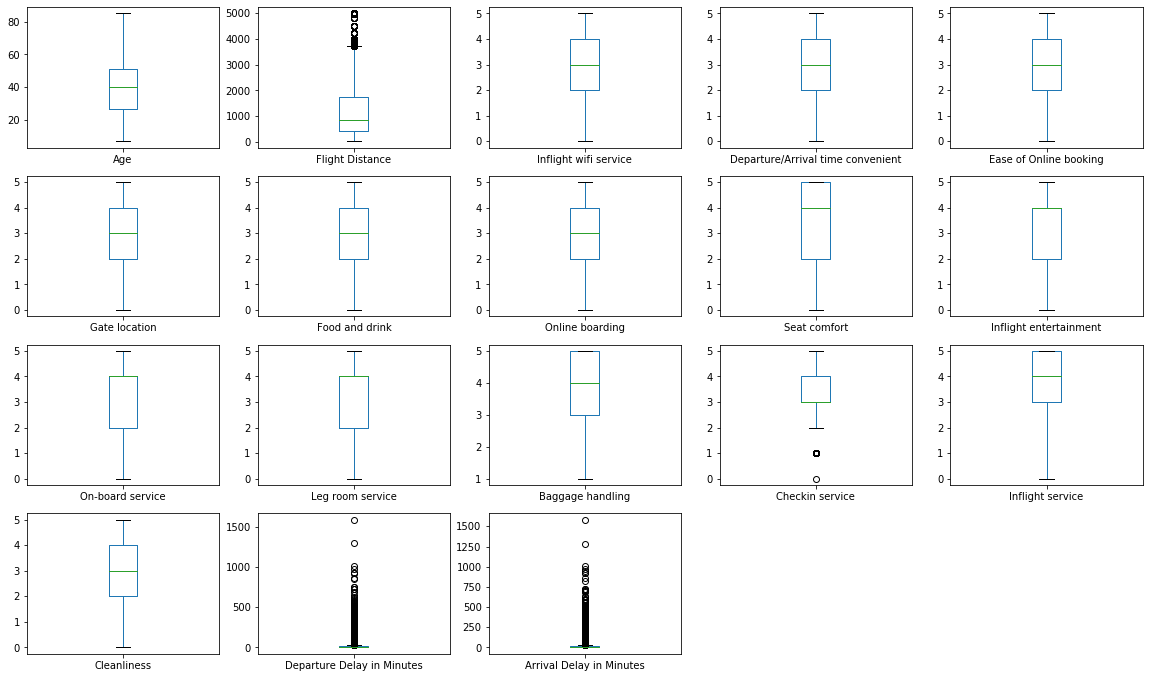

In [17]:
#check outliers
df.plot(kind = "box" , subplots = True , figsize = (20,15) ,  layout = (5,5))
plt.show()

as expected only the three columns(Flight Distance, Departure/Arrival Delay in Minutes) has outliers we need to remove it

### as shown from the plots most of the  features has no outliers 

In [18]:
#statical information about columns with outliers 
df[['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].describe().T

,count,mean,std,min,25%,50%,75%,max
Flight Distance,103594.0,1189.325202,997.297235,31.0,414.0,842.0,1743.0,4983.0
Departure Delay in Minutes,103594.0,14.747939,38.116737,0.0,0.0,0.0,12.0,1592.0
Arrival Delay in Minutes,103594.0,15.178678,38.698682,0.0,0.0,0.0,13.0,1584.0


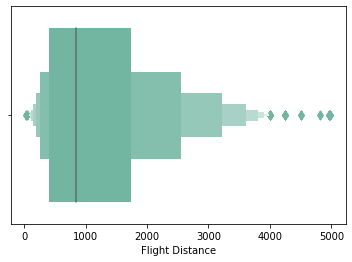

In [19]:
#removing outliers from the columns
sns.boxenplot(x =df['Flight Distance'], palette = 'Set2')

In [20]:
df.loc[df['Flight Distance'] > 3736.5].shape #get number of rows with outliers (Q3 + 1.5(Q3 - Q1))

(2287, 23)

the data is huge so we don't to have outliers to skew distribution of the data

In [21]:
outliers_distance = df[df['Flight Distance'] > 3736.5]
df.drop(outliers_distance.index, inplace = True)

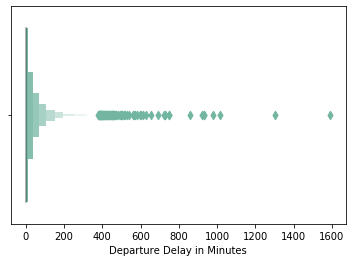

In [22]:
#removing outliers from the columns
sns.boxenplot(x =df['Departure Delay in Minutes'], palette = 'Set2')

In [23]:
df.loc[df['Departure Delay in Minutes'] > 800].shape

(8, 23)

In [24]:
outliers_departure = df[df['Departure Delay in Minutes'] > 800]
df.drop(outliers_departure.index, inplace = True)

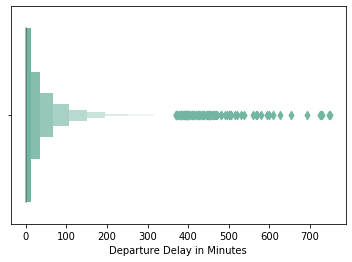

In [25]:
sns.boxenplot(x =df['Departure Delay in Minutes'], palette = 'Set2')

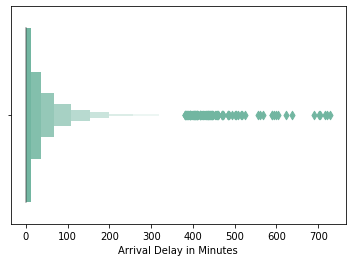

In [26]:
sns.boxenplot(x =df['Arrival Delay in Minutes'], palette = 'Set2')

In [27]:
df.loc[df['Arrival Delay in Minutes'] > 650].shape

(6, 23)

In [28]:
outlier_arrival = df[df['Arrival Delay in Minutes'] > 650]
df.drop(outlier_arrival.index, inplace = True)

<a id='perprocessing'></a>
## Preprocessing

### 1- rename columns
### 2- encoding(will be done later before modeling)

In [29]:
df.rename(columns = lambda x:x.strip().lower().replace(" ", "_"), inplace = True)
df2.rename(columns = lambda x:x.strip().lower().replace(" ", "_"), inplace = True)#rename the columns

In [30]:
df.columns #check columns after renaming

Index(['gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

<a id='eda'></a>
# EDA

## business metrics

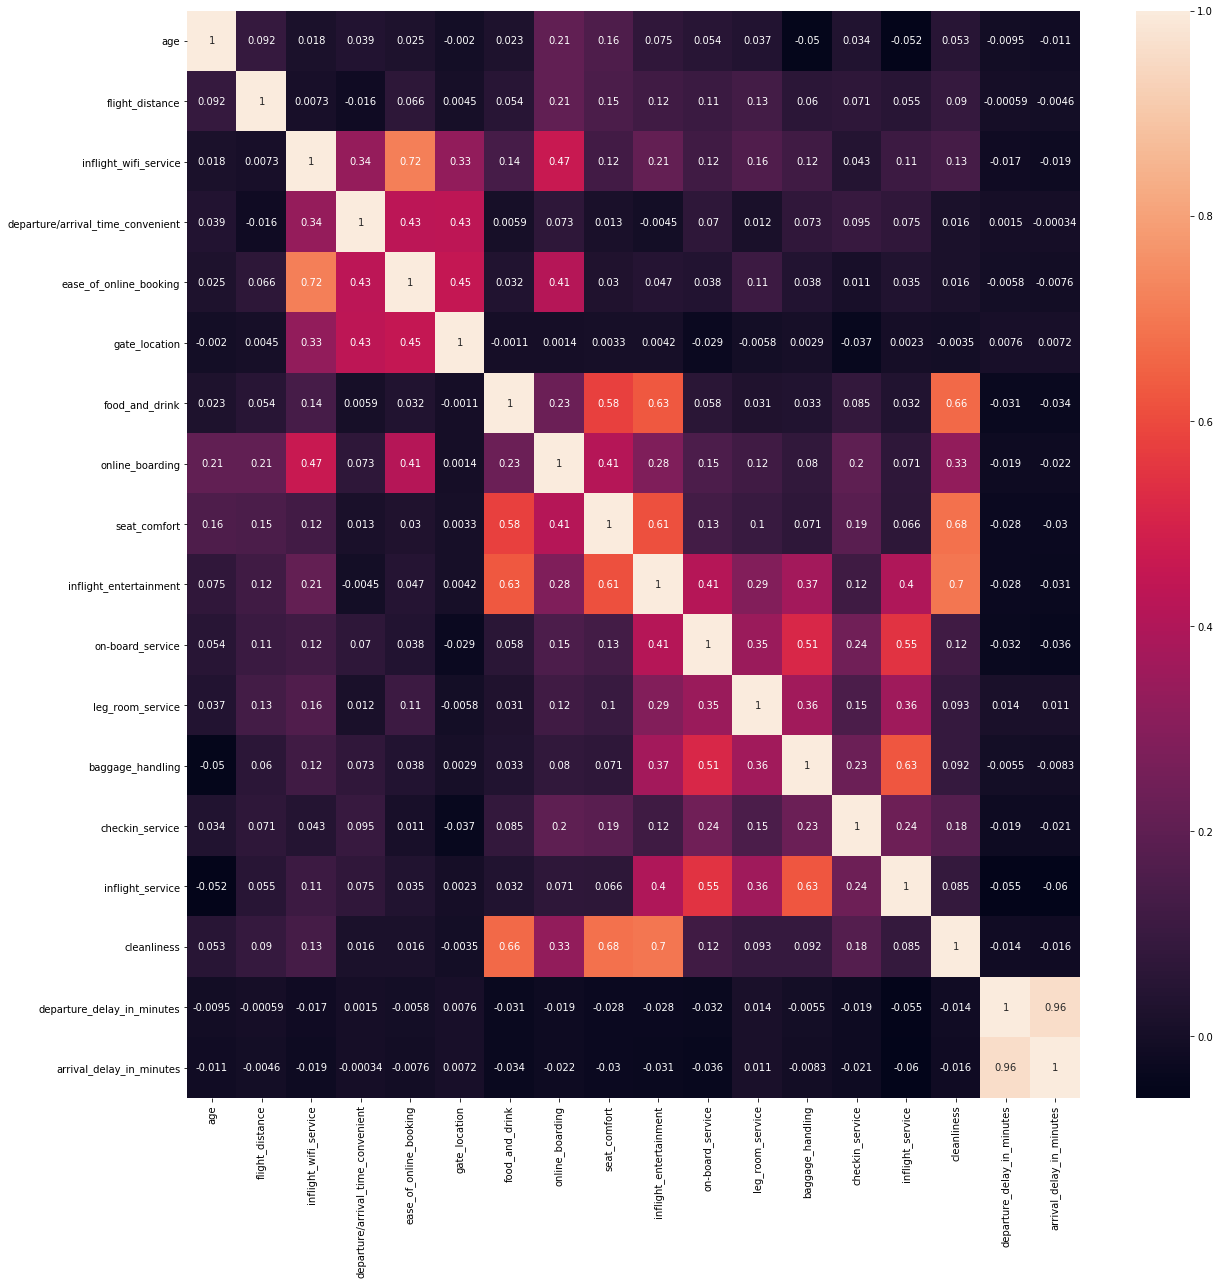

In [31]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

### we want to find which features has the most corrolation to the goal

## visualize data, analysis data

#### visualize the target

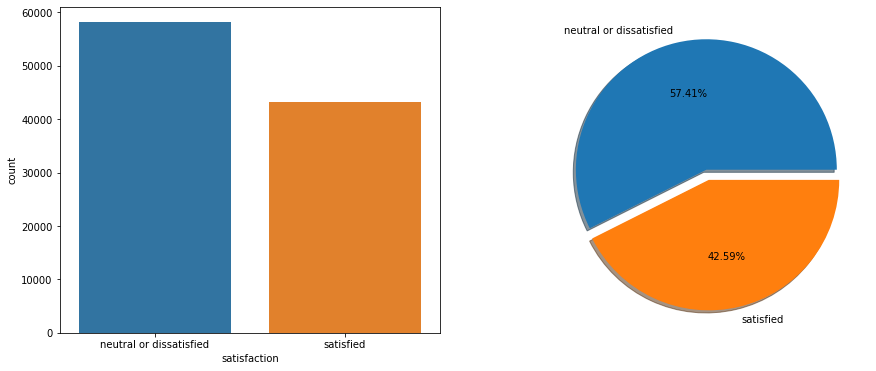

In [32]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x = df['satisfaction'], data = df)

plt.subplot(1, 2, 2)
label = [df.satisfaction.unique()[0], df.satisfaction.unique()[1]]
plt.pie(x= df['satisfaction'].value_counts(), labels = label, explode = (0, 0.08), shadow = True, autopct = '%1.2f%%')

plt.show()

from the plots abvoe we can see that more that half of the customers are unsatisfied, so we will try to know which features is affecting them the most 

### representing data and check how the customer satisfied with it


In [33]:
def plot_data(column):
    plt.figure(figsize = (10, 5))
    plt.subplot(1, 2, 1)
    sns.countplot(x = df[column], data = df)

    plt.subplot(1, 2, 2)
    label = [df.satisfaction.unique()[0], df.satisfaction.unique()[1]]
    sns.countplot(x = df[column], hue = 'satisfaction', data = df, )

    plt.show()

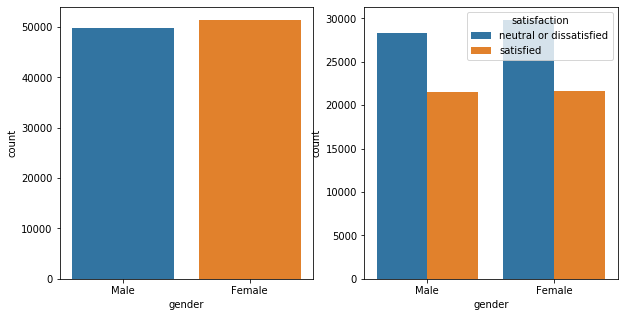

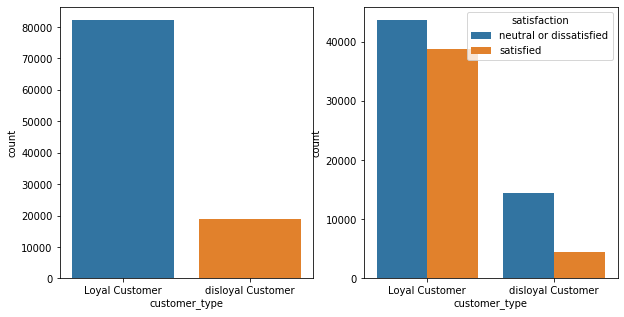

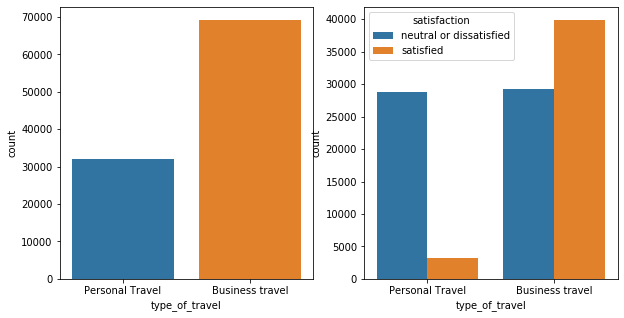

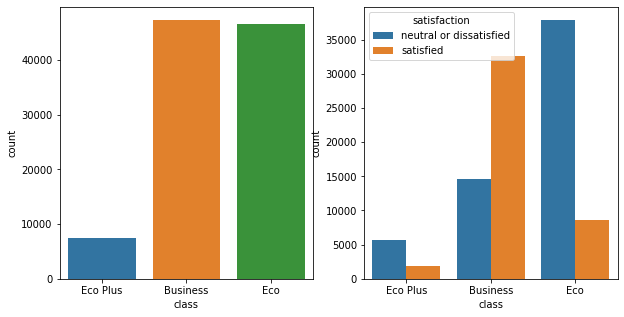

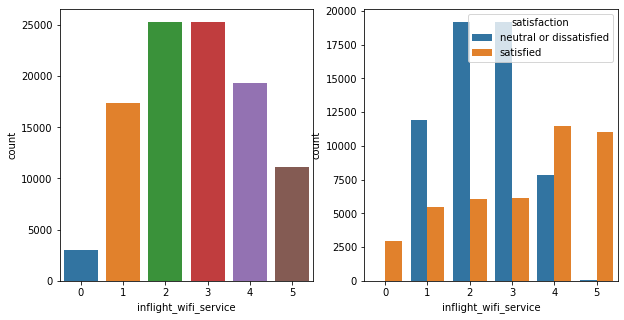

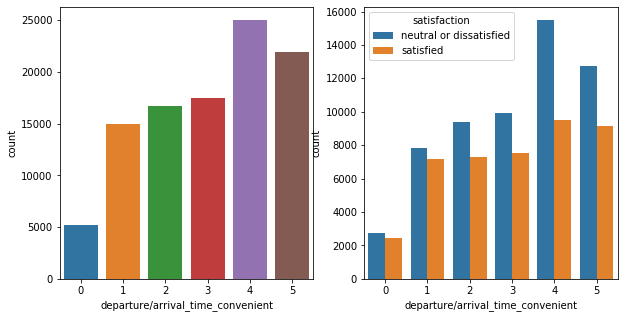

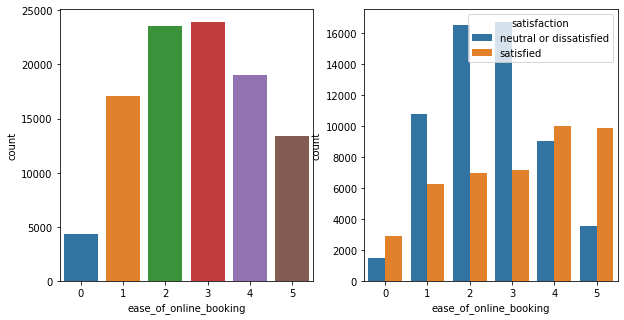

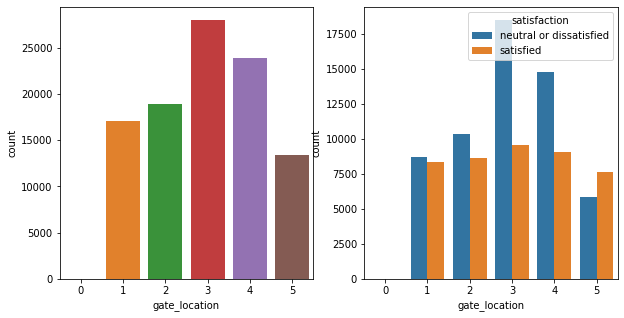

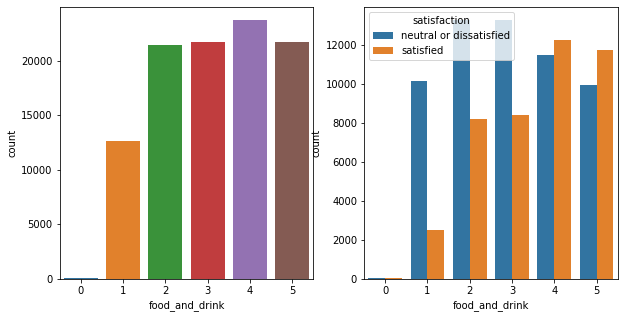

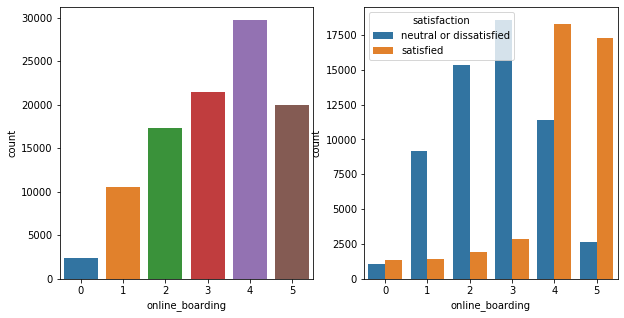

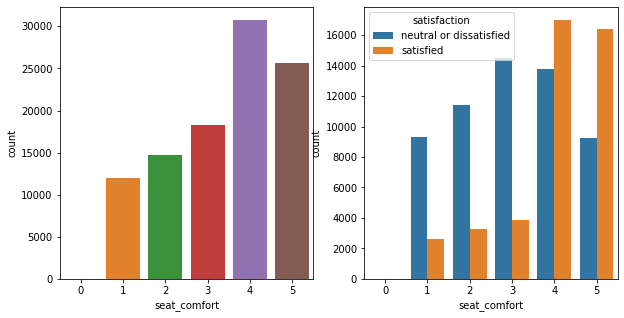

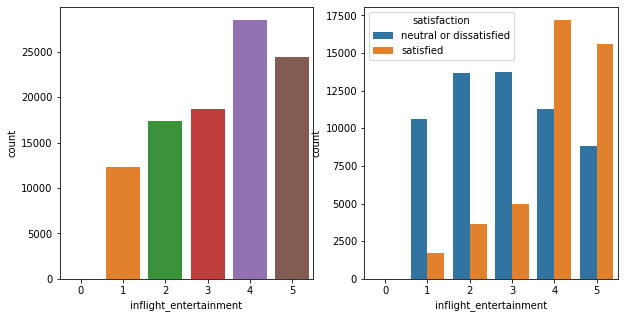

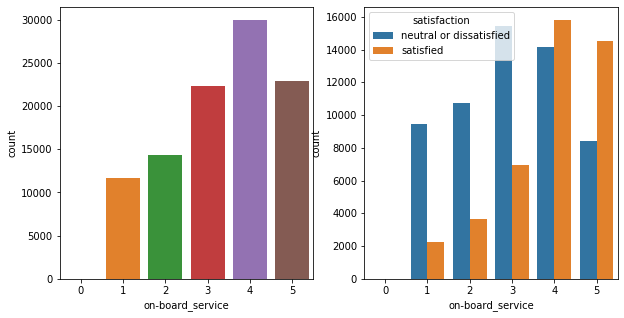

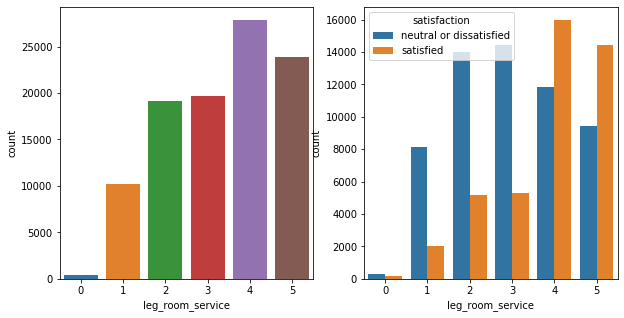

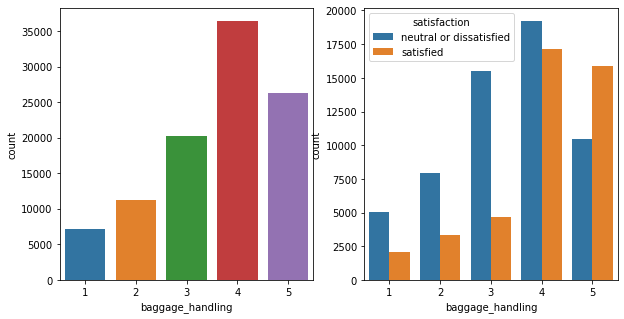

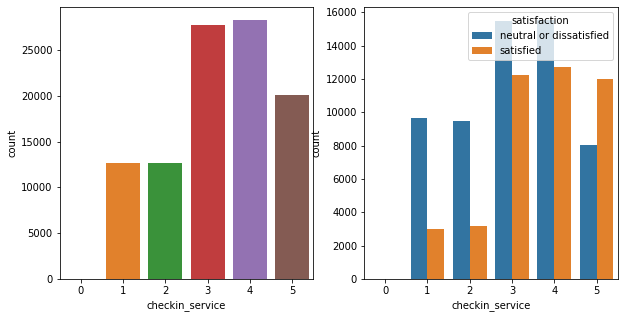

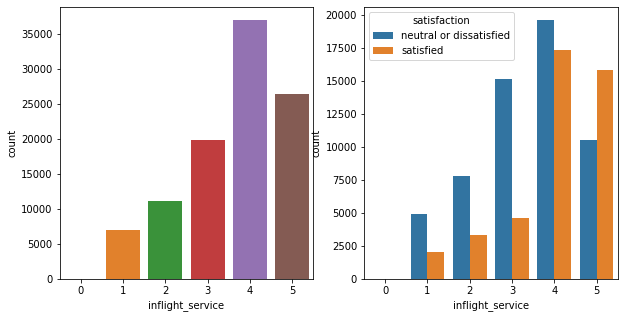

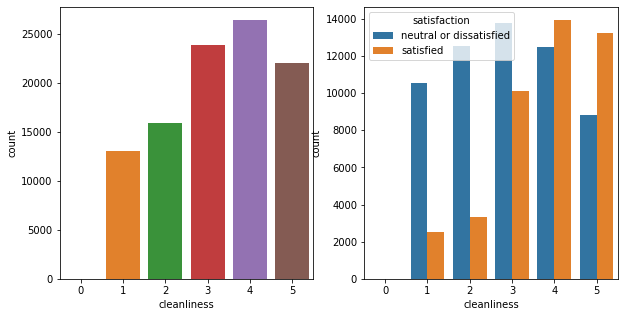

In [34]:
for i in df.columns:
    if len(df[i].unique())<= 6 and i != 'satisfaction':
        plot_data(i)

from the plots above we can find the next:

     1- half of the customers are males and the other half are females and for both of them the majority are not satifsied  
     2- loyal Customers are the majority of the customers over the half are dissatisfied and for the disloyal customers they are minority but most of them are not satisfied
     3- buisness travels are much more than personal travels and most customers in buisness travel are satisfied but for the
     personal travel most customers are not satisfied
     4- for flight classes: eco plus is the least class but the majority are dissatisfied for the buisness class and eco 
     class they have the majority of the customers. most customers of the buisness class are satisfied about it but the 
     opposite for the eco class
     5- for the inflight wifi service the take at most rate 2 so most of the customers are dissatisfied with it
     6- for departure time most of people gave rate 4 and 5 but at the same time they are dissatisfied which mean there are
     another reasons for the dissatisfaction
     7-the online booknig took 2-3 rates which means most of the people wasn't sastisfied with it
     8- and 3 rates was the most rates for gate location so the poeple wasn't satisfied with it
     9- food and drink get high rates but at the same time the most of the people was dissatisfied which mean there are 
     another reasons for their dissatisfaction
     10- online booking get high rate and most of the peopel was satisfied with it
     11- most of rate for seat comfort was high and the majority of the customers were satisfied
     12- inflight entertainment get high reates and majority of the customers were satifsied
     13- on board service have high rates but half of the customers are satisfied and the others are not
     14- leg space has high rates and most people satisfied with it
     15- baggage handling despite it has high reate but many customers were not satisfied which mean there are other reasons
     16- checkin service is high rated withdissatisfaction and the same for inflight service
     17- but for the cleanliness most rates are high but satisfaction is very low

## check affect of some features one by one 

Text(0.5, 1, 'Effect of Food and drink on satisfaction in different types of travel')

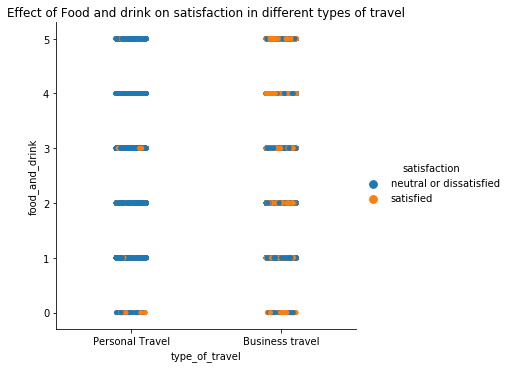

In [35]:
sns.catplot(x="type_of_travel", y="food_and_drink", hue="satisfaction",data= df)
plt.title('Effect of Food and drink on satisfaction in different types of travel')

-Most of Satisfied customers in the Business Travel type chose 4 and 5  rating. 

Text(0.5, 1, 'Effect of on-board service on satisfaction in different classes')

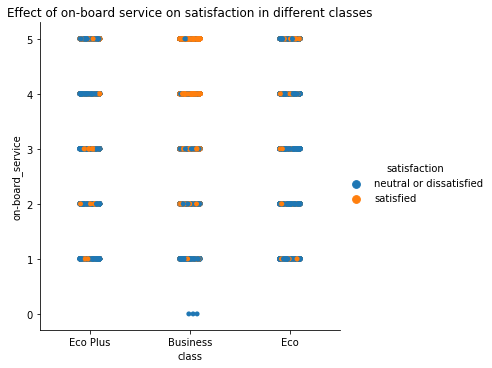

In [36]:
sns.catplot(x="class", y="on-board_service", hue="satisfaction",data= df)
plt.title('Effect of on-board service on satisfaction in different classes')

- On-board service nealy has no effect on the satisfaction for eco class passengers.

- In the business class, the higher is the on-board service rating, the more satisfied the customers become.

Text(0.5, 1.0, 'Effect of Inflight entertainment on satisfaction')

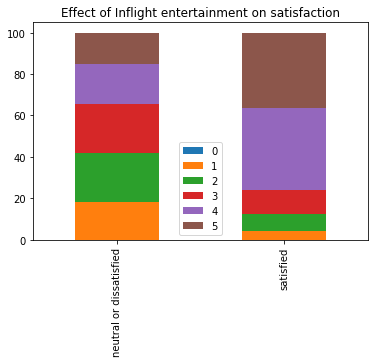

In [37]:
satis=df["satisfaction"]
num0=satis[df["inflight_entertainment"]==0].value_counts()
num1=satis[df["inflight_entertainment"]==1].value_counts()
num2=satis[df["inflight_entertainment"]==2].value_counts()
num3=satis[df["inflight_entertainment"]==3].value_counts()
num4=satis[df["inflight_entertainment"]==4].value_counts()
num5=satis[df["inflight_entertainment"]==5].value_counts()
plotdata=pd.DataFrame({"0":num0, "1":num1, "2":num2,"3":num3,"4":num4,"5":num5})
plotdata2=plotdata.div(plotdata.sum(axis=1),axis=0)*100
plotdata2.plot(kind='bar',stacked = True)
plt.title('Effect of Inflight entertainment on satisfaction')

-By improving the Inflight entertainment service, the number of satisfied customers increases.

Text(0.5, 1.0, 'Effect of Seat comfort on satisfaction')

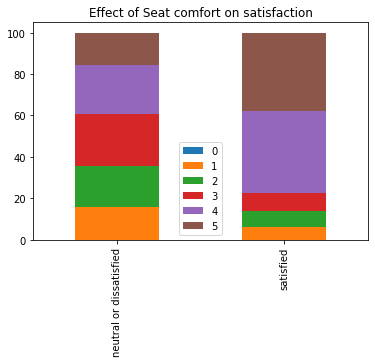

In [38]:
satis=df["satisfaction"]
num0=satis[df["seat_comfort"]==0].value_counts()
num1=satis[df["seat_comfort"]==1].value_counts()
num2=satis[df["seat_comfort"]==2].value_counts()
num3=satis[df["seat_comfort"]==3].value_counts()
num4=satis[df["seat_comfort"]==4].value_counts()
num5=satis[df["seat_comfort"]==5].value_counts()
plotdata=pd.DataFrame({"0":num0, "1":num1, "2":num2,"3":num3,"4":num4,"5":num5})
plotdata2=plotdata.div(plotdata.sum(axis=1),axis=0)*100
plotdata2.plot(kind='bar',stacked = True, style="Classic")
plt.title('Effect of Seat comfort on satisfaction')

-Most of customers who rated 4-5 are satisfied with the airline service.

In [39]:
group_data = df.groupby(['class']).mean().T[2:16]
group_data

class,Business,Eco,Eco Plus
inflight_wifi_service,2.776821,2.675525,2.767529
departure/arrival_time_convenient,2.904811,3.198995,3.216517
ease_of_online_booking,2.914328,2.605491,2.661751
gate_location,2.982785,2.972438,2.966618
food_and_drink,3.319679,3.087113,3.123207
online_boarding,3.707751,2.812735,2.890468
seat_comfort,3.753727,3.139337,3.184609
inflight_entertainment,3.627683,3.098412,3.142915
on-board_service,3.678439,3.120840,3.045717
leg_room_service,3.640541,3.085480,3.061402


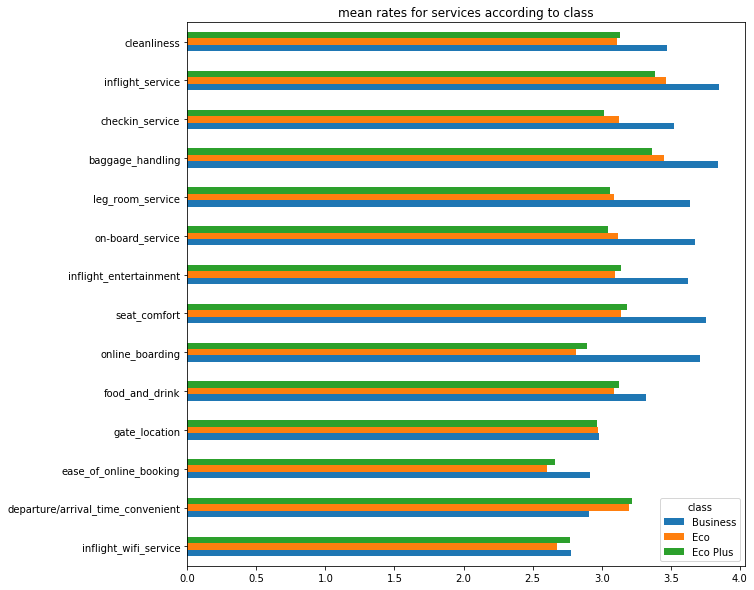

In [40]:
group_data.plot.barh(figsize = (10, 10), stacked = False, title = 'mean rates for services according to class')
plt.show()

In [41]:
data = df.groupby(['type_of_travel']).mean().T[2:16]
group_data

class,Business,Eco,Eco Plus
inflight_wifi_service,2.776821,2.675525,2.767529
departure/arrival_time_convenient,2.904811,3.198995,3.216517
ease_of_online_booking,2.914328,2.605491,2.661751
gate_location,2.982785,2.972438,2.966618
food_and_drink,3.319679,3.087113,3.123207
online_boarding,3.707751,2.812735,2.890468
seat_comfort,3.753727,3.139337,3.184609
inflight_entertainment,3.627683,3.098412,3.142915
on-board_service,3.678439,3.120840,3.045717
leg_room_service,3.640541,3.085480,3.061402


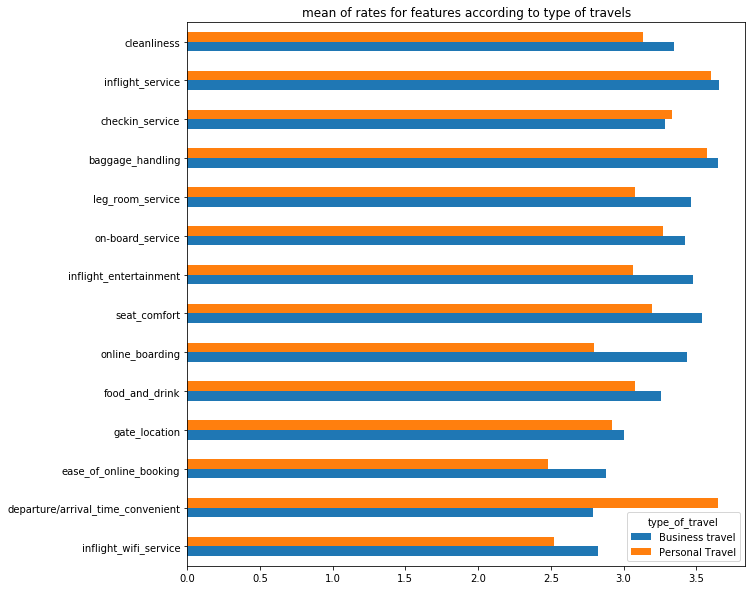

In [42]:
data.plot.barh(figsize = (10, 10), title = 'mean of rates for features according to type of travels')
plt.show()

In [43]:
grouped = df.groupby(['customer_type', 'type_of_travel', 'satisfaction'])['age'].count()[:6]
grouped

customer_type      type_of_travel   satisfaction           
Loyal Customer     Business travel  neutral or dissatisfied    15025
                                    satisfied                  35426
                   Personal Travel  neutral or dissatisfied    28693
                                    satisfied                   3232
disloyal Customer  Business travel  neutral or dissatisfied    14299
                                    satisfied                   4455
Name: age, dtype: int64

disloyal customers in personal travels are very small so we can ignore them as they will not affect the system

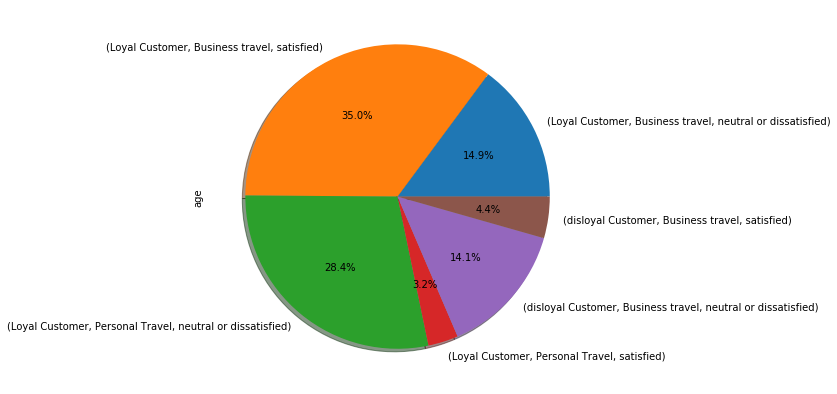

In [44]:
grouped.plot.pie(shadow = True , autopct = '%1.1f%%', subplots = True, figsize = (7, 7))
plt.show()

the top category is satisfied loyal customers in buinsess travel then dissatisfied loyal customers in personal travel

In [45]:
grouped = df.groupby(['customer_type', 'type_of_travel']).mean().T[2:16]
grouped

customer_type                      Loyal Customer                  \
type_of_travel                    Business travel Personal Travel   
inflight_wifi_service                    2.869140        2.521723   
departure/arrival_time_convenient        2.942003        3.651182   
ease_of_online_booking                   2.948306        2.478872   
gate_location                            3.007572        2.918121   
food_and_drink                           3.335791        3.077901   
online_boarding                          3.710154        2.799749   
seat_comfort                             3.740005        3.196868   
inflight_entertainment                   3.642049        3.063774   
on-board_service                         3.494856        3.274268   
leg_room_service                         3.557531        3.077463   
baggage_handling                         3.636479        3.575662   
checkin_service                          3.307685        3.336977   
inflight_service                         3.637391        3.601159   
cleanliness                              3.459416        3.132247   

customer_type                     disloyal Customer                  
type_of_travel                      Business travel Personal Travel  
inflight_wifi_service                      2.709022        2.613497  
departure/arrival_time_convenient          2.381732        3.668712  
ease_of_online_booking                     2.701077        2.466258  
gate_location                              2.994401        2.944785  
food_and_drink                             3.034659        3.073620  
online_boarding                            2.711155        2.472393  
seat_comfort                               2.993975        2.981595  
inflight_entertainment                     3.047190        3.085890  
on-board_service                           3.227898        3.306748  
leg_room_service                           3.217660        3.257669  
baggage_handling                           3.693185        3.717791  
checkin_service                            3.217927        3.257669  
inflight_service                           3.697824        3.773006  
cleanliness                                3.053215        3.098160

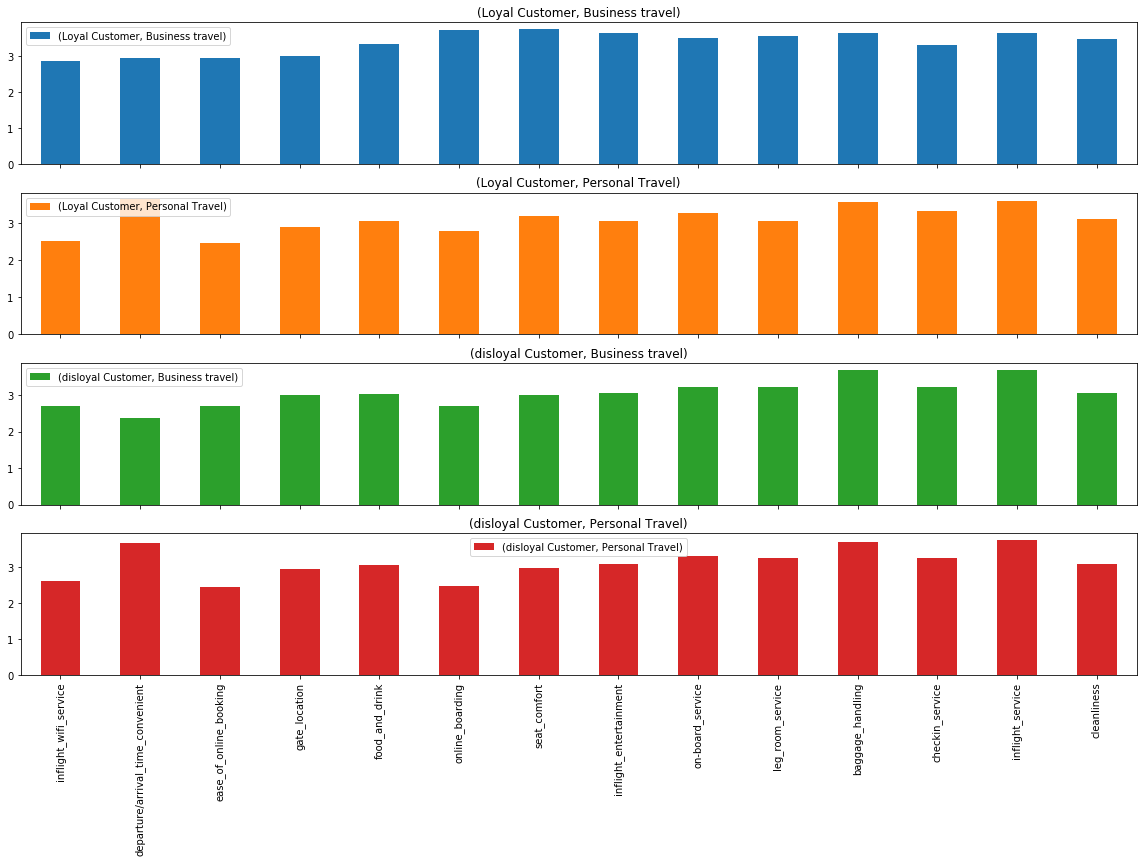

In [46]:
grouped.plot.bar(figsize = (20, 12), subplots = True)
plt.show()

#  Start analysis according to type of travels

In [47]:
b = buisness_travels = df[df['type_of_travel'] == 'Business travel'] #get the data of buisness travles on a separate container
buisness_travels.drop(['gender', 'departure_delay_in_minutes', 'flight_distance'], axis = 1, inplace = True) #drop unnecessary columns

C:\Users\Abdelrahman Hanafy\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [48]:
p = personal_travels = df[df['type_of_travel'] == 'Personal Travel']
personal_travels.drop(['gender', 'departure_delay_in_minutes', 'flight_distance'], axis = 1, inplace = True)

from the brevious chars and plots we found that gender has no effect, flight distance is not a thing we cna control and departure delay in minutes has a big relation almost the same as arrival delay in minutes so we don't need to use them in our analysis

In [49]:
buisness_travels.head(5) #sample of buisness travles

,customer_type,age,type_of_travel,class,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,arrival_delay_in_minutes,satisfaction
1,disloyal Customer,25,Business travel,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1,6.0,neutral or dissatisfied
2,Loyal Customer,26,Business travel,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,satisfied
3,Loyal Customer,25,Business travel,Business,2,5,5,5,2,2,2,2,2,5,3,1,4,2,9.0,neutral or dissatisfied
4,Loyal Customer,61,Business travel,Business,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,satisfied
7,Loyal Customer,52,Business travel,Business,4,3,4,4,5,5,5,5,5,5,5,4,5,4,0.0,satisfied


In [50]:
personal_travels.head() #sample of personal travels

,customer_type,age,type_of_travel,class,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,arrival_delay_in_minutes,satisfaction
0,Loyal Customer,13,Personal Travel,Eco Plus,3,4,3,1,5,3,5,5,4,3,4,4,5,5,18.0,neutral or dissatisfied
5,Loyal Customer,26,Personal Travel,Eco,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0.0,neutral or dissatisfied
6,Loyal Customer,47,Personal Travel,Eco,2,4,2,3,2,2,2,2,3,3,4,3,5,2,23.0,neutral or dissatisfied
11,Loyal Customer,12,Personal Travel,Eco Plus,2,4,2,2,1,2,1,1,1,2,5,5,5,1,0.0,neutral or dissatisfied
13,Loyal Customer,33,Personal Travel,Eco,4,2,4,3,4,4,4,4,4,5,2,2,2,4,0.0,satisfied


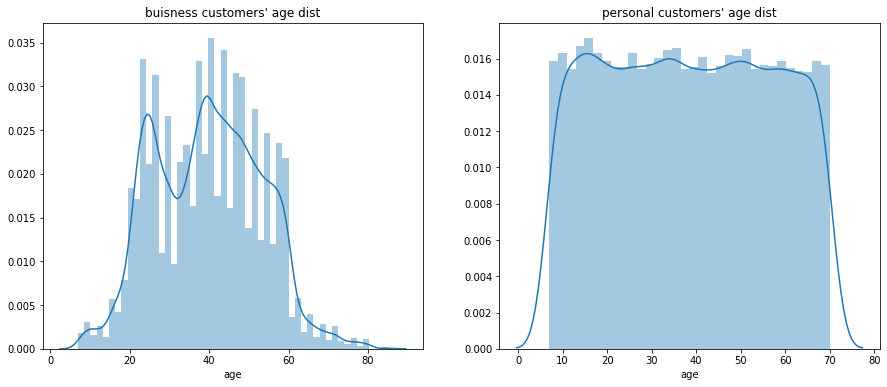

In [51]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.title = ('age_distribution')
sns.distplot(buisness_travels['age']).set_title("buisness customers' age dist")

plt.subplot(1, 2, 2)
plt.title = ('age distribution in personal travels')
sns.distplot(personal_travels['age']).set_title("personal customers' age dist")

plt.show()

we can see that the most of buesniss travelers are between 20s and 50s so to get a high effect we need to concentrate on this age group , while in personal travels all ages from about 10 to 70 so we need to satisfy most of them in any age class so we get hight rates and higher percentage of satisfaction

In [52]:
def separate_ages(age):
    if age <= 18:
        return 'underage'
    elif 18 < age <= 30:
        return 'youth'
    elif 30 < age < 60:
        return 'adult'
    else:
        return 'old'

In [53]:
buisness_travels.age = buisness_travels.age.apply(separate_ages)
personal_travels.age = personal_travels.age.apply(separate_ages)

C:\Users\Abdelrahman Hanafy\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [54]:
print(buisness_travels.age.value_counts())
print(personal_travels.age.value_counts())

adult       44947
youth       17518
old          4102
underage     2638
Name: age, dtype: int64
adult       14550
underage     6171
youth        5963
old          5404
Name: age, dtype: int64


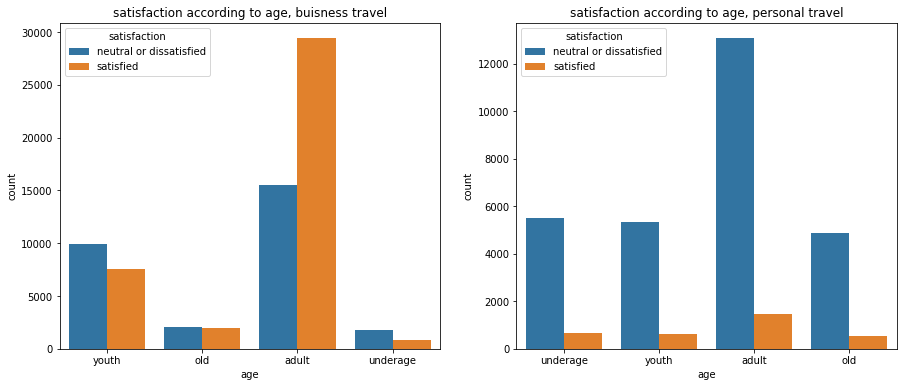

In [55]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1) 
sns.countplot(buisness_travels['age'], hue = 'satisfaction', data = buisness_travels).set_title("satisfaction according to age, buisness travel")

plt.subplot(1, 2, 2)
sns.countplot(personal_travels['age'], hue = 'satisfaction', data = personal_travels).set_title("satisfaction according to age, personal travel")

plt.show()

we can find that most satisfied group are the adults in buisness travels(30~60 years old) on the other case personal travels have no satisfaction at all

In [56]:
def get_satisfaction_rate(column):
    
    buis =  buisness_travels.groupby([column, 'satisfaction'])['satisfaction'].count().unstack().fillna(0)
    pers = personal_travels.groupby([column, 'satisfaction'])['satisfaction'].count().unstack().fillna(0)
    return buis, pers

In [57]:
def print_dist(column):
    plt.figure(figsize = (15, 6))
    plt.subplot(1, 2, 1) 
    sns.countplot(buisness_travels[column], hue = 'satisfaction', data = buisness_travels).set_title('satisfaction with {}, buisness travel'.format(column))

    plt.subplot(1, 2, 2)
    sns.countplot(personal_travels[column], hue = 'satisfaction', data = personal_travels).set_title("satisfaction with {}, personal travel".format(column))

    plt.show()

In [58]:
def print_plot(column):
    satis=b["satisfaction"]
    num0=satis[b[column]==0].value_counts()
    num1=satis[b[column]==1].value_counts()
    num2=satis[b[column]==2].value_counts()
    num3=satis[b[column]==3].value_counts()
    num4=satis[b[column]==4].value_counts()
    num5=satis[b[column]==5].value_counts()
    plotdata=pd.DataFrame({"0":num0, "1":num1, "2":num2,"3":num3,"4":num4,"5":num5})
    plotdata2=plotdata.div(plotdata.sum(axis=1),axis=0)*100
    plotdata2.plot(kind='bar',stacked = True, title = 'Effect of {} on satisfaction in business travel'.format(column))

    satis=p["satisfaction"]
    num0=satis[p[column]==0].value_counts()
    num1=satis[p[column]==1].value_counts()
    num2=satis[p[column]==2].value_counts()
    num3=satis[p[column]==3].value_counts()
    num4=satis[p[column]==4].value_counts()
    num5=satis[p[column]==5].value_counts()
    plotdata=pd.DataFrame({"0":num0, "1":num1, "2":num2,"3":num3,"4":num4,"5":num5})
    plotdata2=plotdata.div(plotdata.sum(axis=1),axis=0)*100
    plotdata2.plot(kind='bar',stacked = True, title = 'Effect of {} on satisfaction in personal travel'.format(column))



## check the effect of the wifi on the satisfaction

In [59]:
wifi_sat_buisness, wifi_sat_personal = get_satisfaction_rate('inflight_wifi_service')
print(wifi_sat_buisness)
print() 
print(wifi_sat_personal)

satisfaction           neutral or dissatisfied  satisfied
inflight_wifi_service                                    
0                                            8       2341
1                                         6112       5457
2                                         9645       6081
3                                         9391       6131
4                                         4068      10158
5                                          100       9713

satisfaction           neutral or dissatisfied  satisfied
inflight_wifi_service                                    
0                                          0.0      645.0
1                                       5772.0        0.0
2                                       9530.0        0.0
3                                       9758.0        0.0
4                                       3771.0     1318.0
5                                          0.0     1294.0


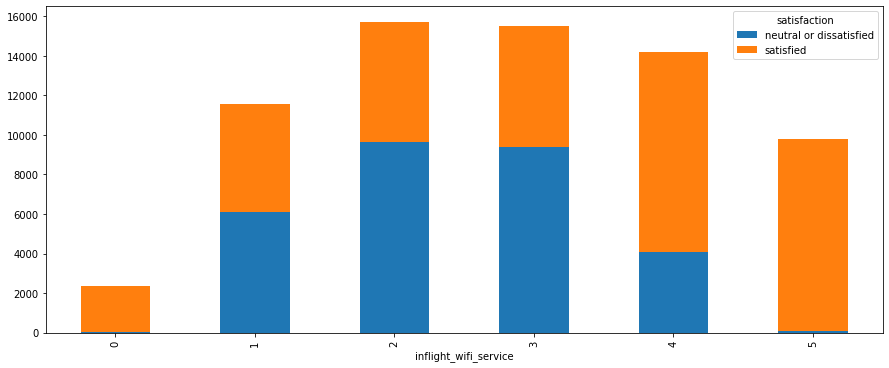

In [60]:
wifi_sat_buisness.plot(kind = 'bar', stacked = True, figsize = (15, 6))

in the above plot we can see that people can be satisfied in case there was no wifi service on the plane for all ages but in case there was any wifi service so they get un-satisfied when the wifi get worse

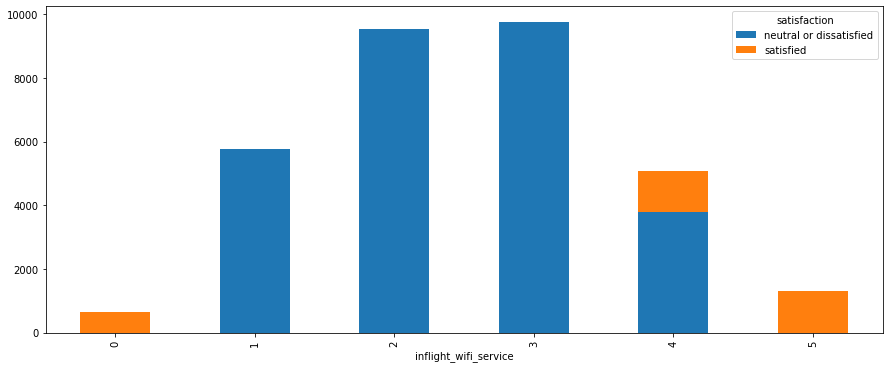

In [61]:
wifi_sat_personal.plot(kind = 'bar', stacked = True, figsize = (15, 6)) #analysis of the data on the 

in case of personal travels we find tha that it's the same case, in case there was no wifi then people are satisfied but when the travel get a bad wifi service then the become dissatisfaction and wifi in personal travels is very bad

so to increase people satisfaction we can improve wifi service in case it was available

## affect of online booking

In [62]:
booking_sat_buisness, booking_sat_personal = get_satisfaction_rate('ease_of_online_booking')

print(booking_sat_buisness)
print(booking_sat_personal)

satisfaction            neutral or dissatisfied  satisfied
ease_of_online_booking                                    
0                                           383       2195
1                                          5479       6203
2                                          7604       6928
3                                          7612       7093
4                                          5175       8825
5                                          3071       8637
satisfaction            neutral or dissatisfied  satisfied
ease_of_online_booking                                    
0                                          1110        682
1                                          5326         58
2                                          8949         33
3                                          9118         92
4                                          3874       1164
5                                           454       1228


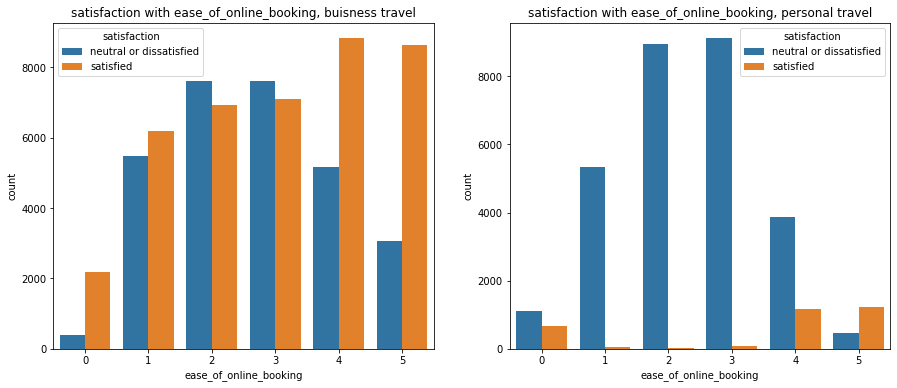

In [63]:
print_dist('ease_of_online_booking')

as shown in the above relations, in case there was no online booking there would be some dis-satisfaction but the majority is satisfied with it 
but in case there was a bad servie and the quality is bad then customers get dis-satisfied

so to improve buinsness travels we need to to increase quality of the online booking and make it easier for the customers
while in personal travels we need to make a new system for online booknig becahse it had a realy bad rates

### affect of gate location on the satisfaction

In [64]:
gate_sat_buisness, gate_sat_personal = get_satisfaction_rate('gate_location')
gate_sat_buisness, gate_sat_personal

(satisfaction   neutral or dissatisfied  satisfied
 gate_location                                    
 0                                  0.0        1.0
 1                               4488.0     7828.0
 2                               5147.0     7999.0
 3                               8431.0     8396.0
 4                               7504.0     8268.0
 5                               3754.0     7389.0,
 satisfaction   neutral or dissatisfied  satisfied
 gate_location                                    
 1                                 4243        493
 2                                 5196        603
 3                                10043       1134
 4                                 7283        821
 5                                 2066        206)

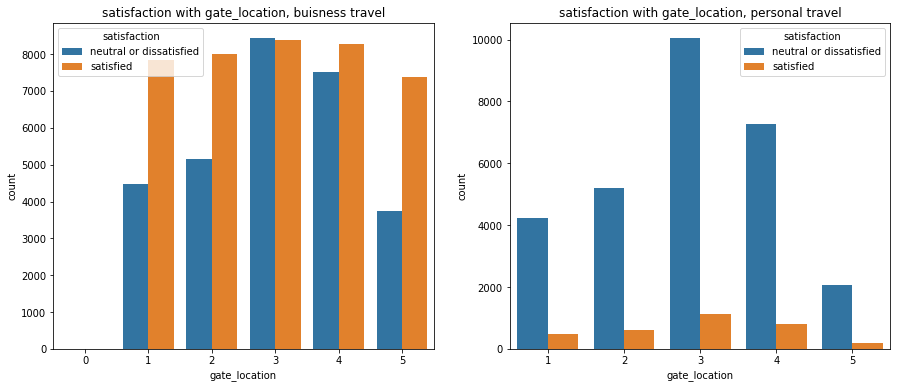

In [65]:
print_dist('gate_location')

from this location we can find that gate location doesnot affect customers satisfaction at all , as shown in buisness travels they always satisfied despite gate location rate
on the other hand personal travels always dis-satisfied dispite all rates

### food and drink affect on the satisfaction

In [66]:
food_sat_buisness, food_sat_personal = get_satisfaction_rate('food_and_drink')
food_sat_buisness, food_sat_personal

(satisfaction    neutral or dissatisfied  satisfied
 food_and_drink                                    
 0                                    23         30
 1                                  5635       2000
 2                                  7000       7508
 3                                  6967       7755
 4                                  5491      11555
 5                                  4208      11033,
 satisfaction    neutral or dissatisfied  satisfied
 food_and_drink                                    
 0                                    31         16
 1                                  4493        505
 2                                  6274        667
 3                                  6309        665
 4                                  5967        712
 5                                  5757        692)

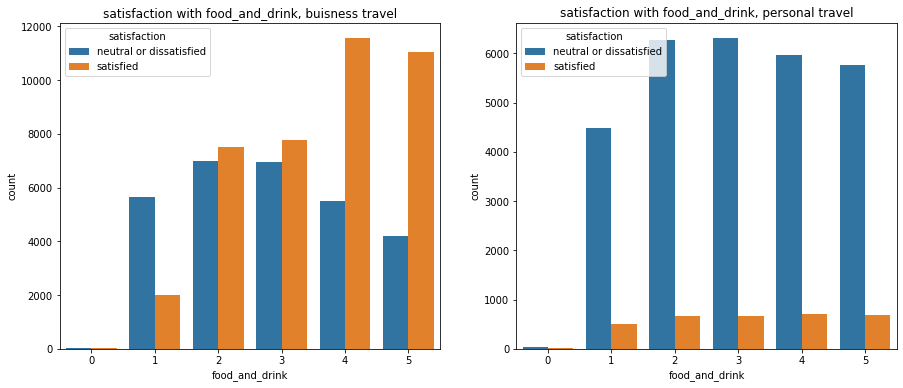

In [67]:
print_dist('food_and_drink')

as we can see from this plots the food is very affective features on the flight when it is high quality it get high rates and the customers are very satisfied 
on the other hand the food represented on the personal flight has alot of low rates and even the high rates has low percentage of satisfaction as the whole features represented on this type of flight is very bad

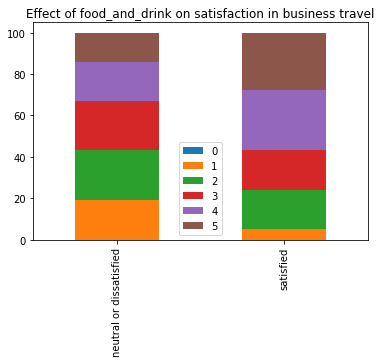

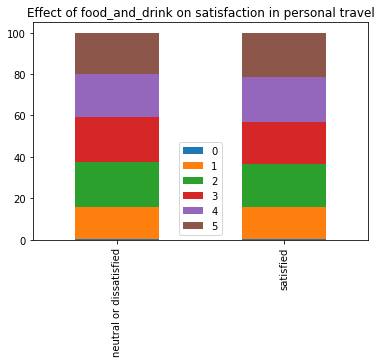

In [68]:
print_plot('food_and_drink')

### affect of departure/arrival time convenient

In [69]:
dep_sat_buisness, dep_sat_personal = get_satisfaction_rate('departure/arrival_time_convenient')
dep_sat_buisness, dep_sat_personal

(satisfaction                       neutral or dissatisfied  satisfied
 departure/arrival_time_convenient                                    
 0                                                     1983       2375
 1                                                     5400       6902
 2                                                     6661       7008
 3                                                     6501       7167
 4                                                     5266       8324
 5                                                     3513       8105,
 satisfaction                       neutral or dissatisfied  satisfied
 departure/arrival_time_convenient                                    
 0                                                      786         81
 1                                                     2428        283
 2                                                     2732        305
 3                                                     3442        340
 4   

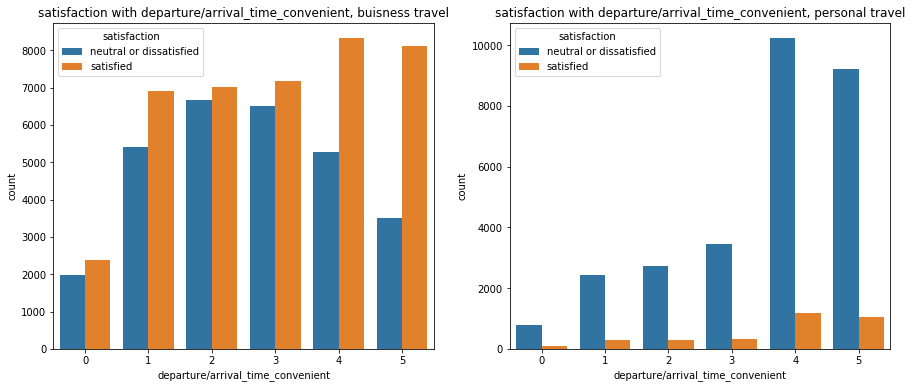

In [70]:
print_dist('departure/arrival_time_convenient')

this features has no effect as it's out of the control of the customer so no need to worry about customer satisfaction according to this feature

### affect of inflight entertainment of satisfaction

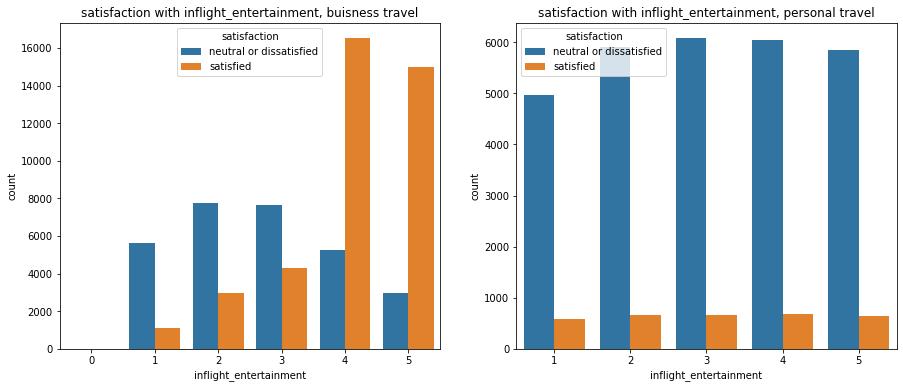

In [71]:
print_dist('inflight_entertainment')

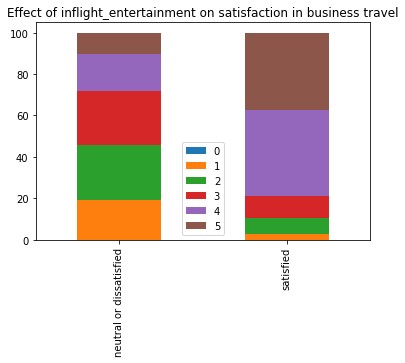

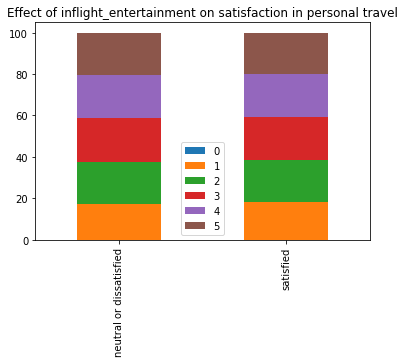

In [72]:
print_plot('inflight_entertainment')

### affect of online boarding on satisfaction

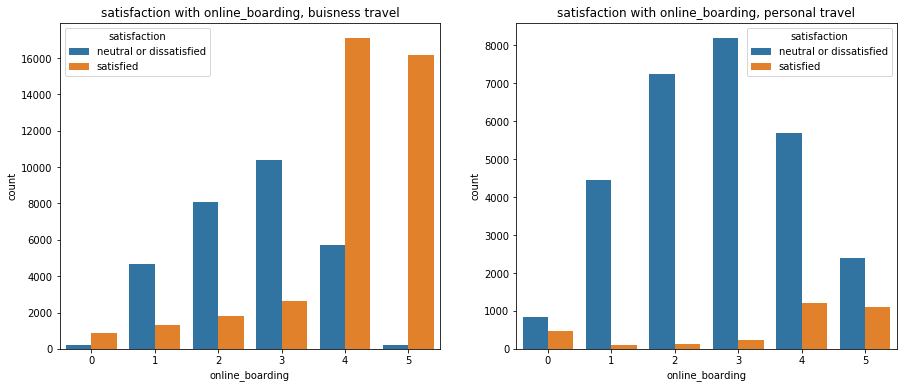

In [73]:
print_dist('online_boarding')

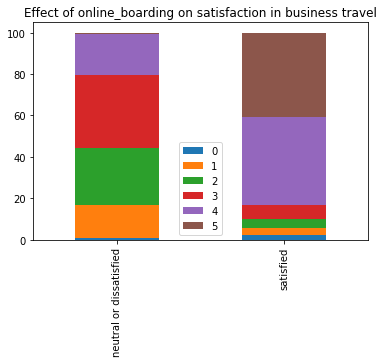

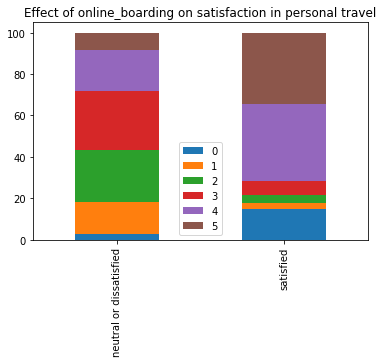

In [74]:
print_plot('online_boarding')

# affect of seat comfort on satisfaction

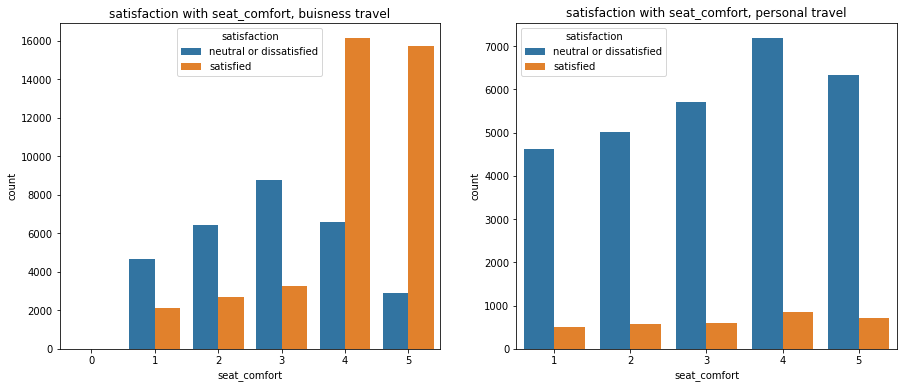

In [75]:
print_dist('seat_comfort')

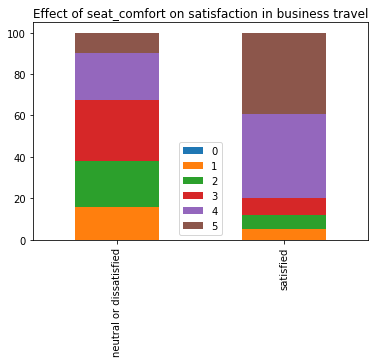

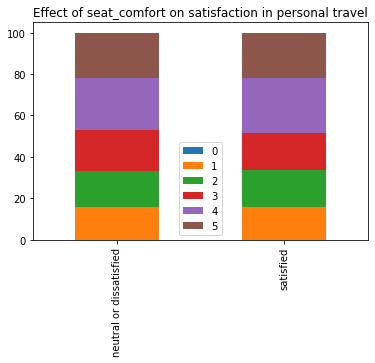

In [76]:
print_plot('seat_comfort')

### affect of on board service on satisfaction

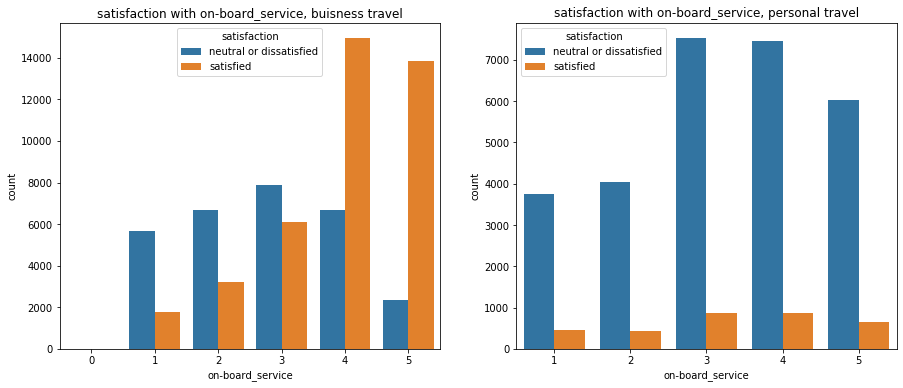

In [77]:
print_dist('on-board_service')

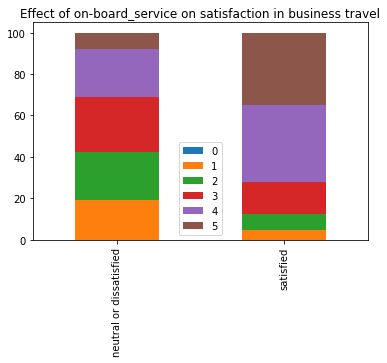

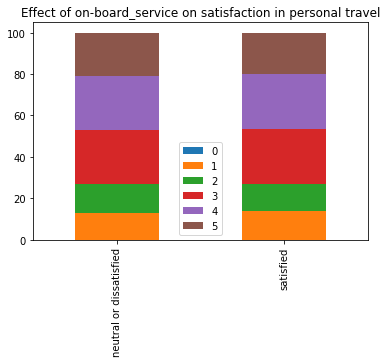

In [78]:
print_plot('on-board_service')

### relation between leg room and satisfaction

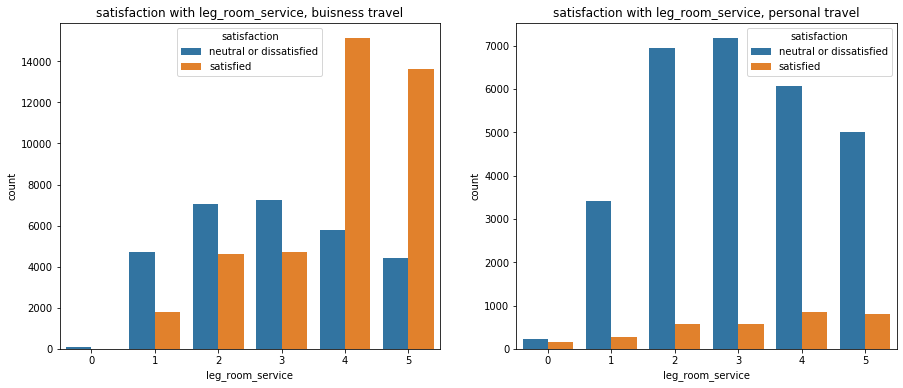

In [79]:
print_dist('leg_room_service')

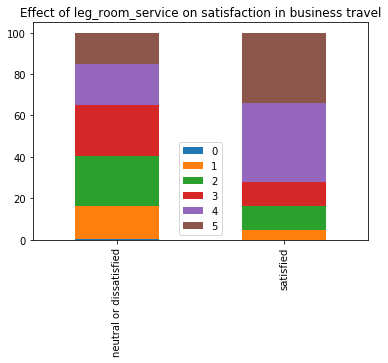

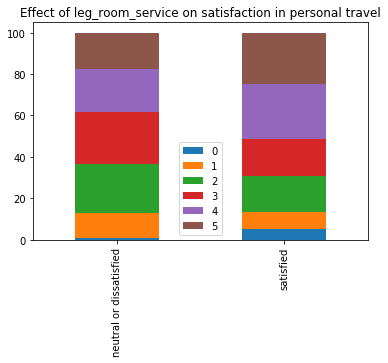

In [80]:
print_plot('leg_room_service')

### relation between baggage_handling and satisfaction

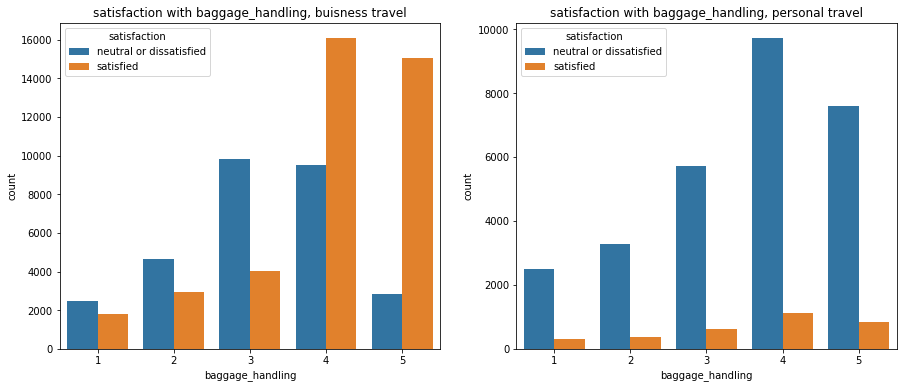

In [81]:
print_dist('baggage_handling')

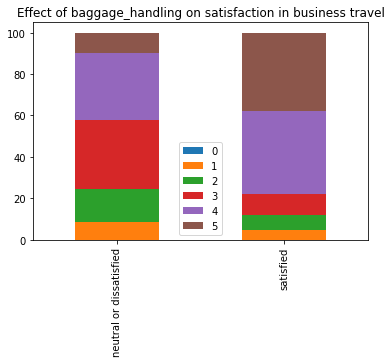

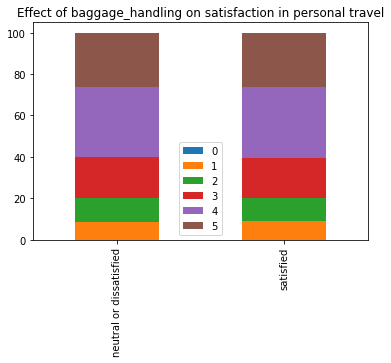

In [82]:
print_plot('baggage_handling')

### relation between checkin service and satisfaction

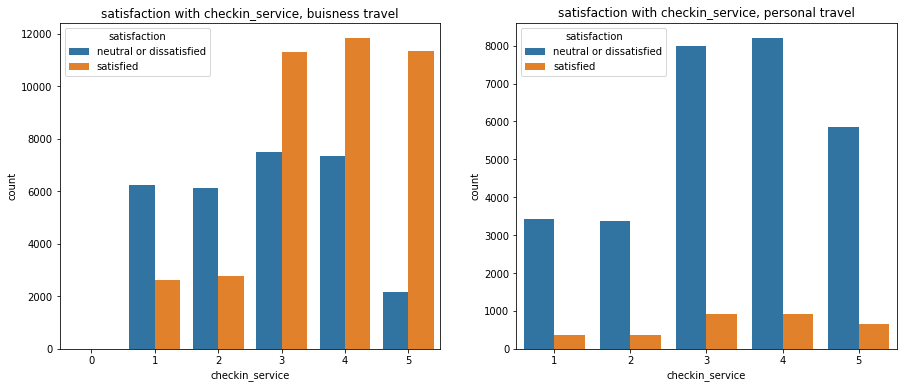

In [83]:
print_dist('checkin_service')

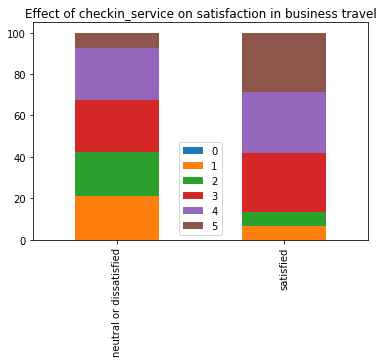

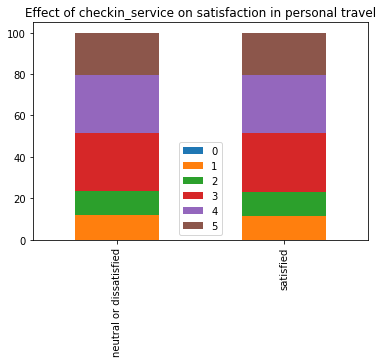

In [84]:
print_plot('checkin_service')

### relation between inflight service and satisfaction

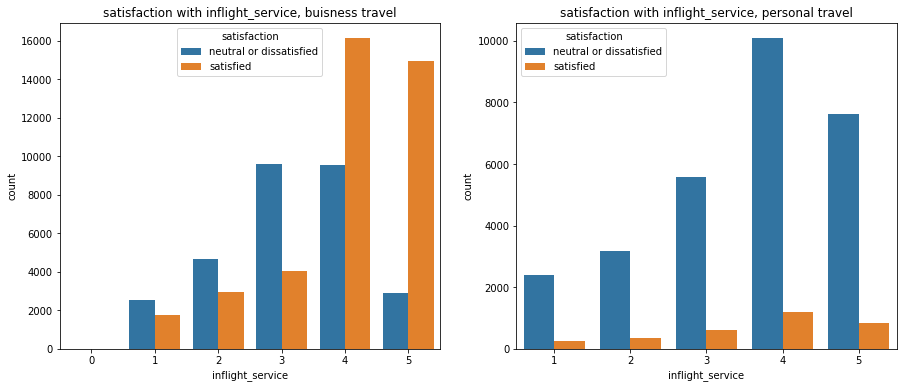

In [85]:
print_dist('inflight_service')

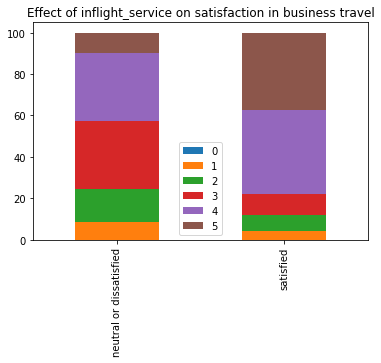

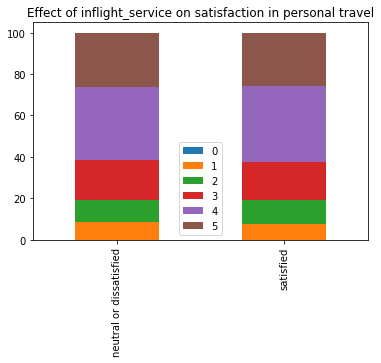

In [86]:
print_plot('inflight_service')

### relation between cleanliness and satisfaction

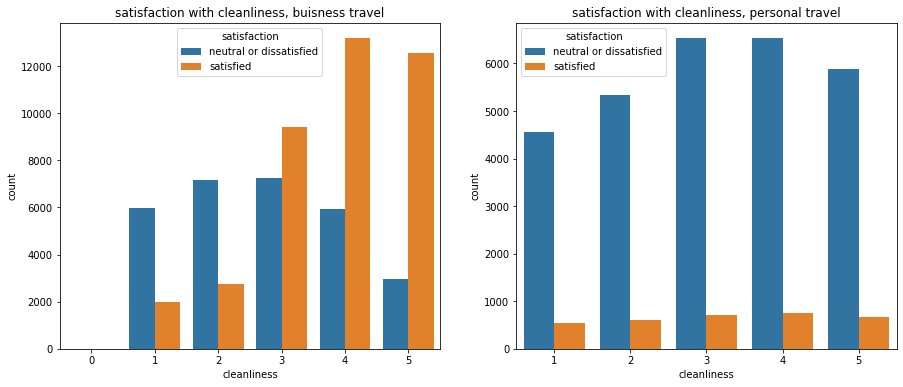

In [87]:
print_dist('cleanliness')

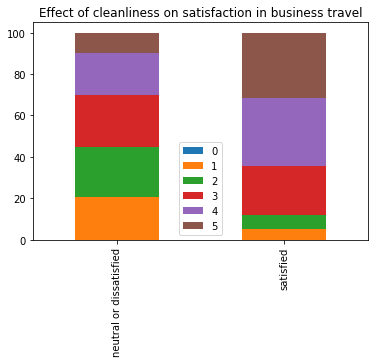

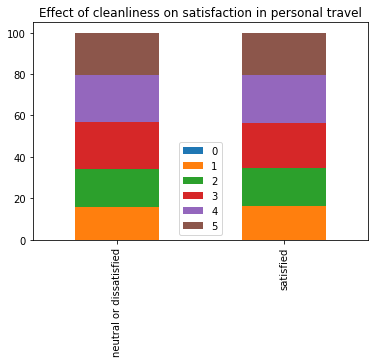

In [88]:
print_plot('cleanliness')

## relation between some features and each other

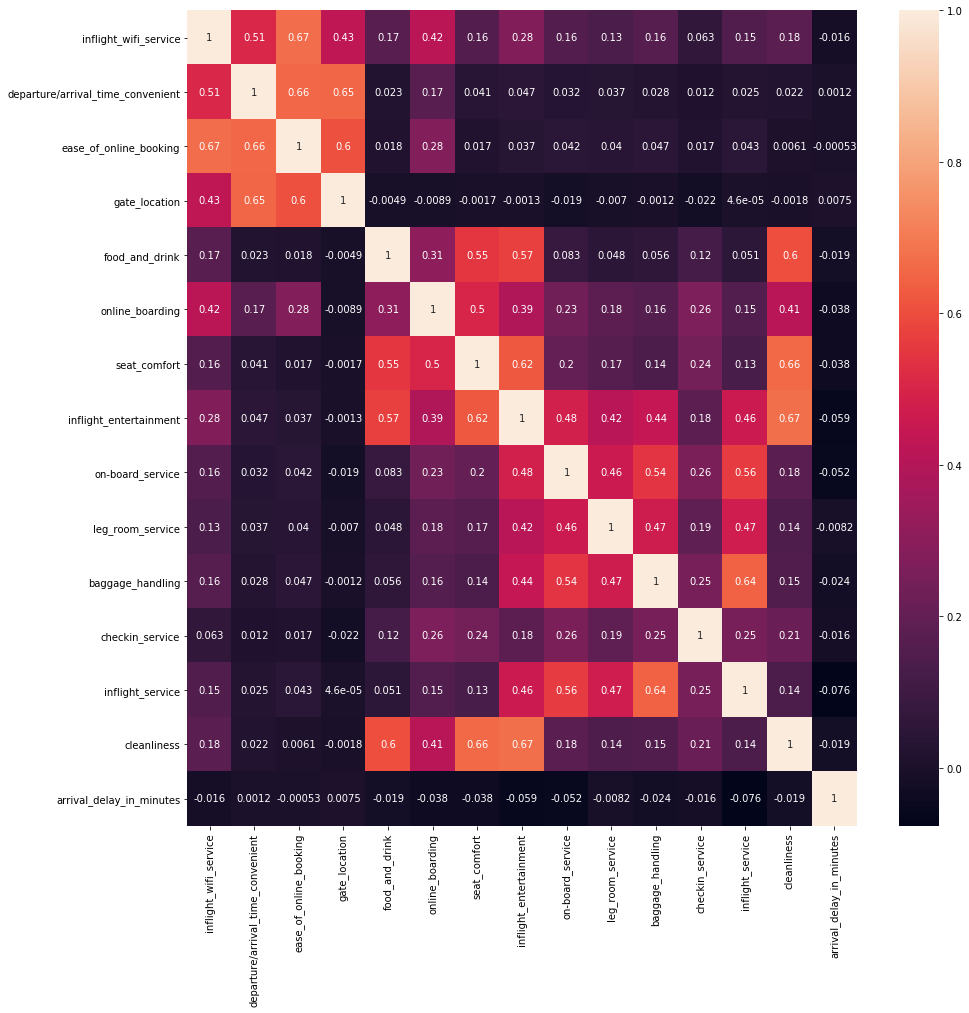

In [89]:
plt.figure(figsize = (15,15))
sns.heatmap(buisness_travels.corr(), annot = True)

from the above heatmap we can find that there is a powerful relation between some services like

1- cleanliness with food and drink, seat comfort and inflight entertainment

2- inflight service with on board service and baggage handling

3- inflight wifi services with ease of online booking

4- online boarding with seat comfort

5- gate location with ease of online booking and departure/arrival time convenient

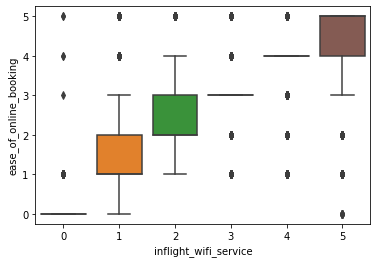

In [90]:
sns.boxplot(x = 'inflight_wifi_service', y = 'ease_of_online_booking', data = buisness_travels)

from this plot we can find that the companies that support online booknig in easy way have a good in inflight wifi whcih mean more satisfaction in the flight

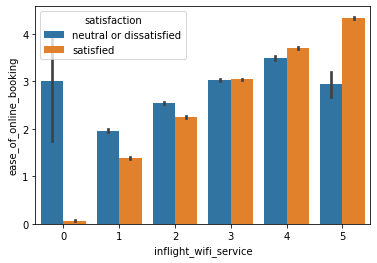

In [91]:
sns.barplot(x='inflight_wifi_service', y='ease_of_online_booking', hue = 'satisfaction', data = buisness_travels)

form here we can see that providing a good inflight wifi service to the customers is more important than providing an easy way to book online

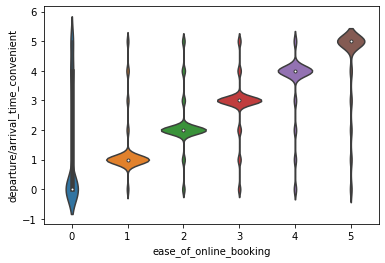

In [92]:
sns.violinplot(x = 'ease_of_online_booking', y = 'departure/arrival_time_convenient', data = buisness_travels)

as we can see there is a linear relation between ease of online booking and departure and arrival time as online booking offers a good way to choose the suitable time for each customer  

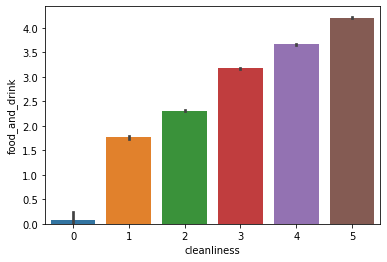

In [93]:
sns.barplot(x = 'cleanliness', y = 'food_and_drink', data = buisness_travels)

there is a big relation between cleanliness and food and drink as shown in the above data, so

# remove unnecessary columns after analysis

In [94]:
df_3 = df.drop(['gender', 'departure_delay_in_minutes', 'gate_location'], axis = 1)
df_3

,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,arrival_delay_in_minutes,satisfaction
0,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,5,3,5,5,4,3,4,4,5,5,18.0,neutral or dissatisfied
1,disloyal Customer,25,Business travel,Business,235,3,2,3,1,3,1,1,1,5,3,1,4,1,6.0,neutral or dissatisfied
2,Loyal Customer,26,Business travel,Business,1142,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,satisfied
3,Loyal Customer,25,Business travel,Business,562,2,5,5,2,2,2,2,2,5,3,1,4,2,9.0,neutral or dissatisfied
4,Loyal Customer,61,Business travel,Business,214,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,disloyal Customer,23,Business travel,Eco,192,2,1,2,2,2,2,2,3,1,4,2,3,2,0.0,neutral or dissatisfied
103900,Loyal Customer,49,Business travel,Business,2347,4,4,4,2,4,5,5,5,5,5,5,5,4,0.0,satisfied
103901,disloyal Customer,30,Business travel,Business,1995,1,1,1,4,1,5,4,3,2,4,5,5,4,14.0,neutral or dissatisfied
103902,disloyal Customer,22,Business travel,Eco,1000,1,1,1,1,1,1,1,4,5,1,5,4,1,0.0,neutral or dissatisfied


# Encoding

In [95]:
categorical = ['gender', 'customer_type', 'type_of_travel', 'class', 'satisfaction']
#Count number of distinct elements in specified axis.
maxDistinct = 0
for column in categorical:
    distinctRows1 = df[column].nunique()
    distinctRows2 = df2[column].nunique()
    if distinctRows1 > maxDistinct:
        maxDistinct = distinctRows1
    if distinctRows2 > maxDistinct:
        maxDistinct = distinctRows2

print('The maximum number of distinct values of a categorical feature is', maxDistinct)

The maximum number of distinct values of a categorical feature is 3


In [96]:
# Categorical to numerical in train set
for column in categorical:
    numerical = pd.get_dummies(df[column], drop_first=True)
    df = pd.concat([df, numerical], axis=1)
    df.drop(column, inplace=True, axis=1)

df.head()

,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,...,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,Male,disloyal Customer,Personal Travel,Eco,Eco Plus,satisfied
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,1,0,1,0,1,0
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.0,1,1,0,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,0,0,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.0,0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,1,0,0,0,0,1


In [97]:
# Categorical to numerical in test set
for column in categorical:
    numerical = pd.get_dummies(df2[column], drop_first=True)
    df2 = pd.concat([df2, numerical], axis=1)
    df2.drop([column], inplace=True, axis=1)

df2.head()

,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,...,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,Male,disloyal Customer,Personal Travel,Eco,Eco Plus,satisfied
0,52,160,5,4,3,4,3,4,3,5,...,5,5,50,44.0,0,0,0,1,0,1
1,36,2863,1,1,3,1,5,4,5,4,...,4,5,0,0.0,0,0,0,0,0,1
2,20,192,2,0,2,4,2,2,2,2,...,2,2,0,0.0,1,1,0,1,0,0
3,44,3377,0,0,0,2,3,4,4,1,...,1,4,0,6.0,1,0,0,0,0,1
4,49,1182,2,3,4,3,4,1,2,2,...,2,4,0,20.0,0,0,0,1,0,1


In [98]:
# Find whether any null value exists in train_df and test_df
print(df.isna().sum())
print(df2.isna().sum())

age                                  0
flight_distance                      0
inflight_wifi_service                0
departure/arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
Male                                 0
disloyal Customer                    0
Personal Travel                      0
Eco                                  0
Eco Plus                             0
satisfied                            0
dtype: int64
age                                  0
flight_dista

In [99]:
# Convert pandas to numpy array for processing
train = df.values
test = df2.values

In [100]:
# Seperate labels from features. Label is our last column
idx_of_label = df.shape[1] - 1

X_train = train[:, :idx_of_label]
y_train = train[:, idx_of_label]

X_test = test[:, :idx_of_label]
y_test = test[:, idx_of_label]

# Final data shapes
print(X_train.shape)
print(y_train.shape)

(101293, 23)
(101293,)


## Feature Scaling

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
#We use Feature Scaling to standardize the independent features in a fixed range so each feature contributes approximately to model. 


In [102]:
no_of_satisfied = np.sum(y_train, axis=0)
samples = y_train.shape[0]
print('The percentage of satisfied customers is: {:.2f} %'.format((no_of_satisfied / samples) * 100))
print('The percentage of dissatisfied customers is: {:.2f} %'.format((1 - (no_of_satisfied / samples)) * 100))

The percentage of satisfied customers is: 42.59 %
The percentage of dissatisfied customers is: 57.41 %


<a id="conculsion"></a>
# Conclusion

We can conclude that the data is quite balanced and do not require any special treatment or resampling.

gender:
The satisfied vs dissatisfied ratio in both genders is the same.
So, this feature should be ignored as it does not contribute to the overall satisfaction level.

gate location:- 
This feature does not affect the satisfaction level in both types of travel. So, this feature is to be ignored.

inflight entertainment:-
As shown, a change in the satisfaction level causes a huge rise in the number of satisfied people in the Business type of travel

seat comfort:-
The number of satisfied people in business level substantially increases by increasing the satisfaction level of seat comfort.

online boarding :-
As shown below, the higher the satisfaction level, the bigger is the number of satisfied customers.

baggage handling:-
Any increase in the satisfaction level of baggage handling service is accompanied by a substantial increase in the number of satisfied customers.

onboard service:-
A change in rating has an enormous effect on the number of satisfied customer in the business travel.

online booking:- 
The number of satisfied people slightly increases by changing the satisfaction level.

Now we are ready, yaaaaaaah

<a id='modeling'></a>
# Modeling

In [103]:
#importing Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [104]:
#importing validation models
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import  f1_score
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,ConfusionMatrixDisplay

Models i use:

1- K-Nearest Neighbors

2- Decision Tree

3- Random Forest

4- XGB 

5- Naive Classifier

6- Logistic Regression

7- Linear Support Vector Machine




### Function to validate scores 

In [105]:
def classification_task( model,X_train_scaled, y_train ,X_test_scaled ,y_test, predic,model_name):
 
    perf_df=pd.DataFrame({'Train_Score':model.score(X_train_scaled,y_train),"Test_Score":model.score(X_test_scaled,y_test),
                       "Precision_Score":precision_score(y_test,predic),"Recall_Score":recall_score(y_test,predic),
                       "F1_Score":f1_score(y_test,predic) , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return perf_df


## 1- KNN model

In [106]:
# Train KNN model on the scaled data 
KNN = KNeighborsClassifier()
# Fit the model
KNN.fit(X_train_scaled,y_train)
#predict x_test_scaled
pred_1 = KNN.predict(X_test_scaled)


In [107]:
#calling the score function
Eval_KNN= classification_task(KNN,X_train_scaled, y_train ,X_test_scaled ,y_test,pred_1,"KNN" )
Eval_KNN


,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
KNN,0.948269,0.930329,0.951544,0.886406,0.917821,0.930329


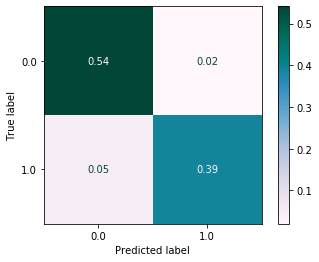

In [108]:
#creating confusion matrix to know the errors
conf = confusion_matrix(y_test, pred_1 ,normalize="all")
disp = ConfusionMatrixDisplay(conf, KNN.classes_).plot(cmap=plt.cm.PuBuGn)

## 2- Decision Tree model

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. Decision Trees has several hyper-parameters but the ones used in this example are "max_depth" (i.e., the maximum number of nodes) and "min_samples_leaf" (i.e., the minimum number of samples required to be at a leaf node).

GridSearchCV() is used for selecting the combination of hyper-parameters that returns the highest value of "f1_score" (a classification metric, harmonic mean of "precision" ( TPTP+FP ) and "recall" ( TPTP+FN ) ). It is instantiated and placed as a scoring parameter.

In [109]:
# Train decision tree model on the scaled data
Decision_Tree = DecisionTreeClassifier() 
# Fit the model
Decision_Tree.fit(X_train_scaled,y_train)
#predict x_test_scaled
pred_ = Decision_Tree.predict(X_test_scaled)

In [110]:
#calling the score function
Eval_dec = classification_task(Decision_Tree,X_train_scaled, y_train ,X_test_scaled ,y_test,pred_,"Decision Tree" )
Eval_dec

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Decision Tree,1.0,0.944966,0.936424,0.938319,0.937371,0.944966


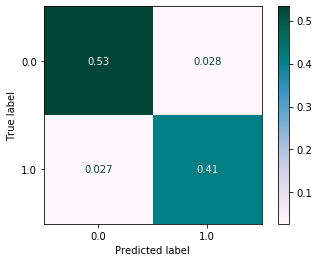

In [111]:
#creating confusion matrix to know the errors
conf = confusion_matrix(y_test, pred_ ,normalize="all")
disp = ConfusionMatrixDisplay(conf, Decision_Tree.classes_).plot(cmap=plt.cm.PuBuGn)

## 3- Random Forest


Random Forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [112]:
# Train Random forest model on the scaled data
Random_Forest= RandomForestClassifier()
# Fit the model
Random_Forest.fit(X_train_scaled,y_train)
#predict x_test_scaled
pred_rand = Random_Forest.predict(X_test_scaled)



In [113]:
#calling the score function
Eval_fores= classification_task(Random_Forest,X_train_scaled, y_train ,X_test_scaled ,y_test,pred_rand,"Random Forest" )
Eval_fores

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Random Forest,1.0,0.962538,0.972114,0.941663,0.956646,0.962538


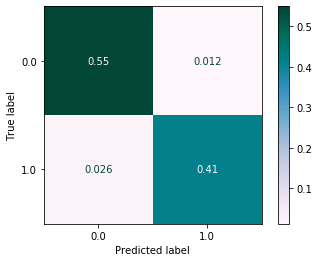

In [114]:
#creating confusion matrix to know the errors
conf = confusion_matrix(y_test, pred_rand ,normalize="all")
disp = ConfusionMatrixDisplay(conf, Random_Forest.classes_).plot(cmap=plt.cm.PuBuGn)

## 4- XGB model

XGB was made to obtain better results with XGBoost. It provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way

In [115]:
# Train XGB boost model on the scaled data
xgb = XGBClassifier()
# Fit the model
xgb.fit(X_train_scaled,y_train)
#predict x_test_scaled
pred = xgb.predict(X_test_scaled)


C:\Users\Abdelrahman Hanafy\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:52:39] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [116]:
#calling the score function
Eval_XGB= classification_task(xgb,X_train_scaled, y_train ,X_test_scaled ,y_test,pred,"XGB" )
Eval_XGB

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
XGB,0.973532,0.963079,0.970527,0.944567,0.957371,0.963079


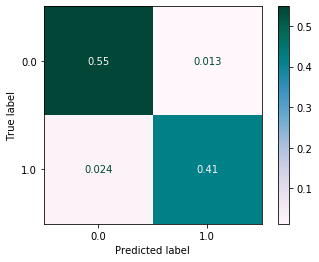

In [117]:
#creating confusion matrix to know the errors
conf = confusion_matrix(y_test, pred ,normalize="all")
disp = ConfusionMatrixDisplay(conf, xgb.classes_).plot(cmap=plt.cm.PuBuGn)

## 5- Naive Bayes classifier

In [118]:
# Train naive bayes boost model on the scaled data
clf = GaussianNB()
# Fit the model
clf.fit(X_train_scaled,y_train)
#predict x_test_scaled
pred_clf = clf.predict(X_test_scaled)


In [119]:
#calling the score function
Eval_clf= classification_task(clf,X_train_scaled, y_train ,X_test_scaled ,y_test,pred_clf,"Naive Bayes" )
Eval_clf

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Naive Bayes,0.86004,0.856293,0.850835,0.815574,0.832832,0.856293


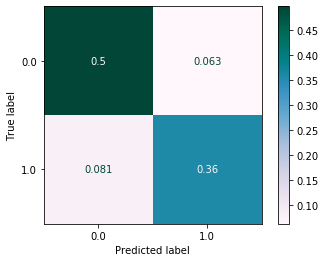

In [120]:
#creating confusion matrix to know the errors
conf = confusion_matrix(y_test, pred_clf ,normalize="all")
disp = ConfusionMatrixDisplay(conf, clf.classes_).plot(cmap=plt.cm.PuBuGn)

## 6- Logisitc Regression

In [121]:
# Train the Logistic Regression model on the scaled data and print the model score
lr = LogisticRegression()
# Fit the model
lr.fit(X_train_scaled, y_train)
#predict x_test_scaled
pred_2 = lr.predict(X_test_scaled)


In [122]:
#calling the score function
Eval_lr= classification_task(lr,X_train_scaled, y_train ,X_test_scaled ,y_test,pred_2,"logisitc regression" )
Eval_lr

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
logisitc regression,0.875115,0.871432,0.868827,0.83282,0.850443,0.871432


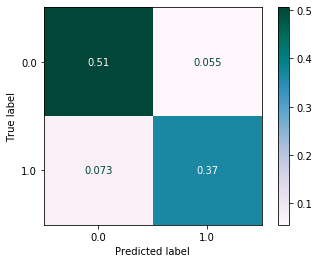

In [123]:
#creating confusion matrix to know the errors
conf = confusion_matrix(y_test, pred_2 ,normalize="all")
disp = ConfusionMatrixDisplay(conf, lr.classes_).plot(cmap=plt.cm.PuBuGn)

## 7- SVM model

SVMs are models that "draw" lines or hyperplanes (based on the training set) to determine which class any new test sample belongs to. The lines or hyperplanes are created so as to maximize the distance between them and the training samples. Linear SVMs are used to solve linearly separable problems whereas for more complex problems SVMs that utilize rbf kernels and augment the dimensionality of the problem are used instead.

In [124]:
# Train the svc model on the scaled data and print the model score
svc = SVC(random_state=0,C=0.2,kernel='rbf')
#fitting model
svc.fit(X_train_scaled, y_train)
#predict
pred_svc = svc.predict(X_test_scaled)

In [125]:
#calling the score function
Eval_svc= classification_task(svc,X_train_scaled, y_train ,X_test_scaled ,y_test,pred_svc,"SVC" )
Eval_svc

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
SVC,0.94045,0.94149,0.943534,0.921865,0.932574,0.94149


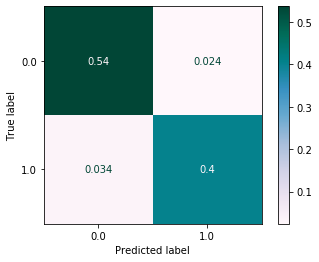

In [126]:
#creating confusion matrix to know the errors
conf = confusion_matrix(y_test, pred_svc ,normalize="all")
disp = ConfusionMatrixDisplay(conf, svc.classes_).plot(cmap=plt.cm.PuBuGn)

In [127]:
#model comparison 
pd.concat([Eval_KNN, Eval_dec , Eval_fores , Eval_XGB ,Eval_clf , Eval_lr, Eval_svc])   

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
KNN,0.948269,0.930329,0.951544,0.886406,0.917821,0.930329
Decision Tree,1.000000,0.944966,0.936424,0.938319,0.937371,0.944966
Random Forest,1.000000,0.962538,0.972114,0.941663,0.956646,0.962538
XGB,0.973532,0.963079,0.970527,0.944567,0.957371,0.963079
Naive Bayes,0.860040,0.856293,0.850835,0.815574,0.832832,0.856293
logisitc regression,0.875115,0.871432,0.868827,0.832820,0.850443,0.871432
SVC,0.940450,0.941490,0.943534,0.921865,0.932574,0.941490


As we see in the comparison best model is Random forest then after it Bagging
So here is confusion matrix in details for Random forest 

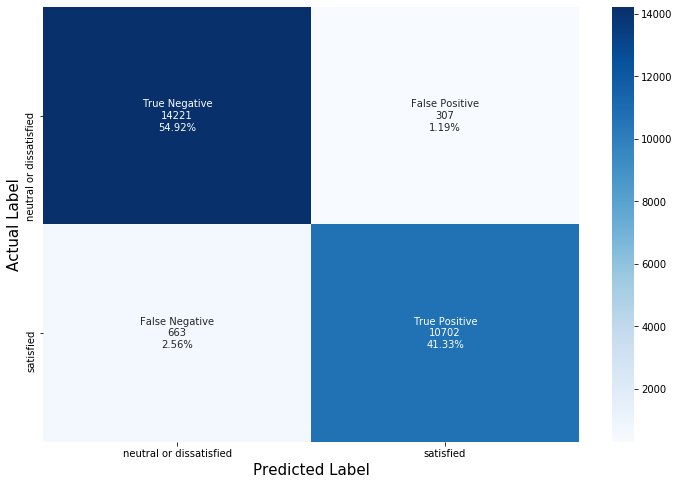

In [128]:
plt.figure(figsize=(12, 8))
cf_matrix=confusion_matrix(y_test,pred_rand)
group_names = ["True Negative","False Positive","False Negative","True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax=sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues',xticklabels=["neutral or dissatisfied","satisfied"], yticklabels=["neutral or dissatisfied","satisfied"])
ax.set_xlabel('Predicted Label',fontsize = 15)
ax.set_ylabel('Actual Label',fontsize = 15)
plt.show()

## Applying feature_importances_ over the trained model 

In [129]:
feature_names = [f"feature {i}" for i in range(X_train_scaled.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [130]:
import time
import numpy as np

start_time = time.time()
importances = Random_Forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in Random_Forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.026 seconds


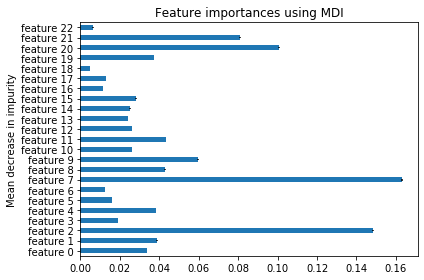

In [131]:
import pandas as pd

Random_Forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
Random_Forest_importances.plot.barh(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Applying feature_importances_ over the trained model shows the weight each column (feature) has. For example, the 7-th feature ("Class Seat") has the highest importance for determining a passenger's satisfaction as we in visualization.